In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")

# Loading dataset
df = pd.read_csv('complete.csv')
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', dayfirst=True)

# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Check for null values
print(df.isnull().sum())
print("\n")

# Correcting Total Confirmed Cases
numeric_columns = ['Death', 'Recovered', 'New cases', 'New recovered']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Checking for non-numeric entries
print(df[numeric_columns].info())
print(df[numeric_columns].isnull().sum())

# Correcting Total Confirmed Cases
df['Total confirmed cases'] = (
    df['Death'].fillna(0) +
    df['Recovered'].fillna(0) +
    df['New cases'].fillna(0)
)

# Data Cleaning
df_cleaned = df.dropna(subset=['Total Confirmed cases', 'Death', 'Recovered', 'New cases', 'New recovered'])

# Descriptive Statistics
print(df_cleaned.describe())
print("\n")

Date                     0
State                    0
Total Confirmed cases    0
Death                    0
Recovered                0
New cases                0
New deaths               0
New recovered            0
dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4692 entries, 0 to 4691
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Death          4691 non-null   float64
 1   Recovered      4692 non-null   int64  
 2   New cases      4692 non-null   int64  
 3   New recovered  4692 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 146.8 KB
None
Death            1
Recovered        0
New cases        0
New recovered    0
dtype: int64
                                Date  Total Confirmed cases         Death  \
count                           4691            4691.000000   4691.000000   
mean   2020-05-26 10:15:47.004903168           11396.348540    291.280750   
min              2020-

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

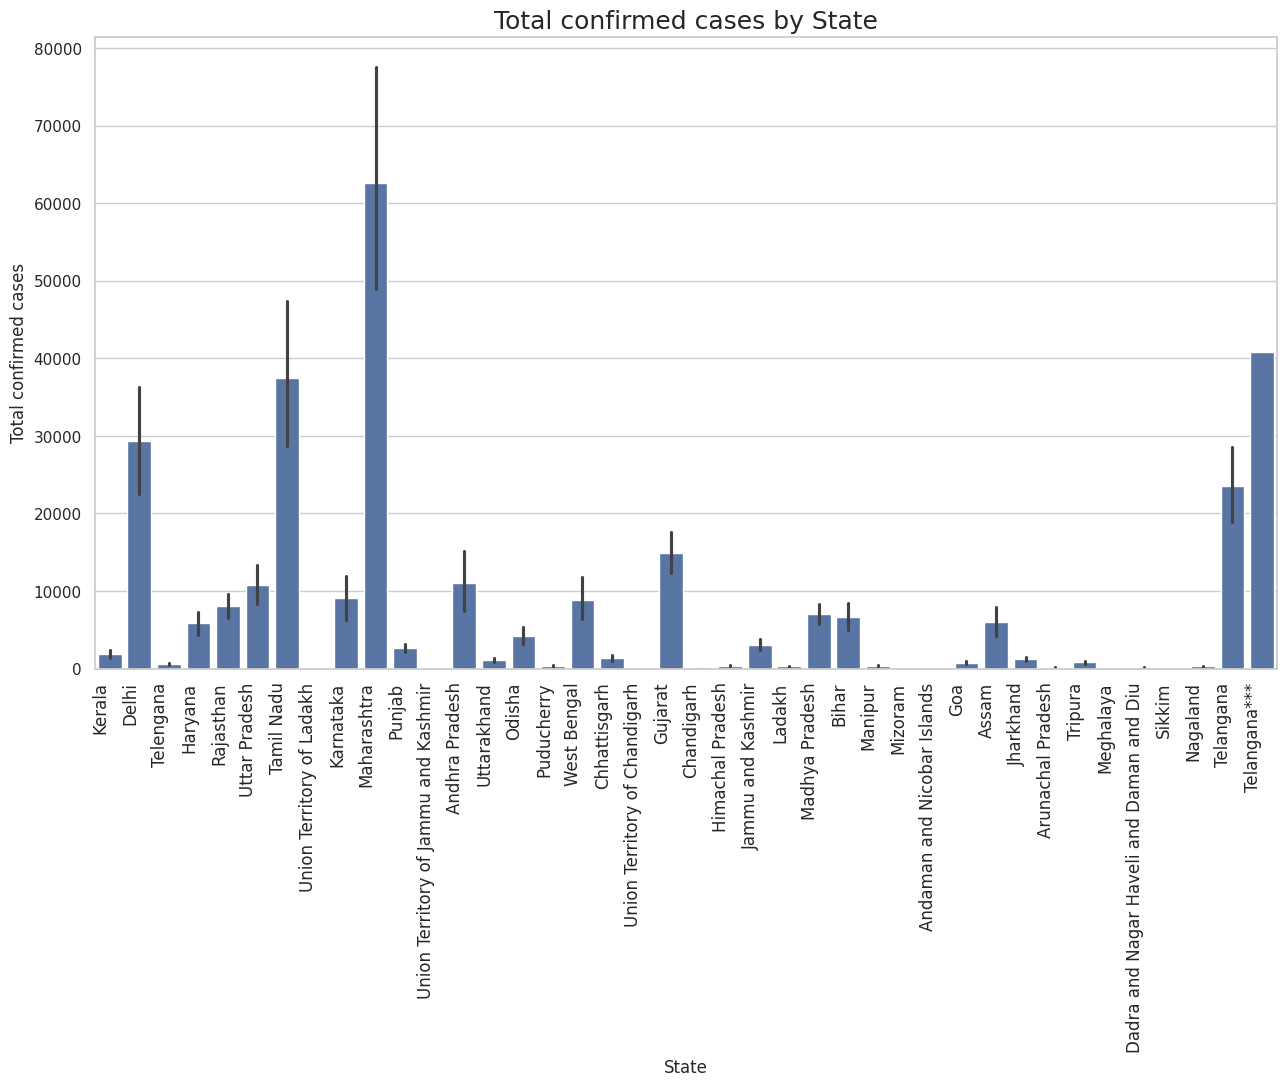

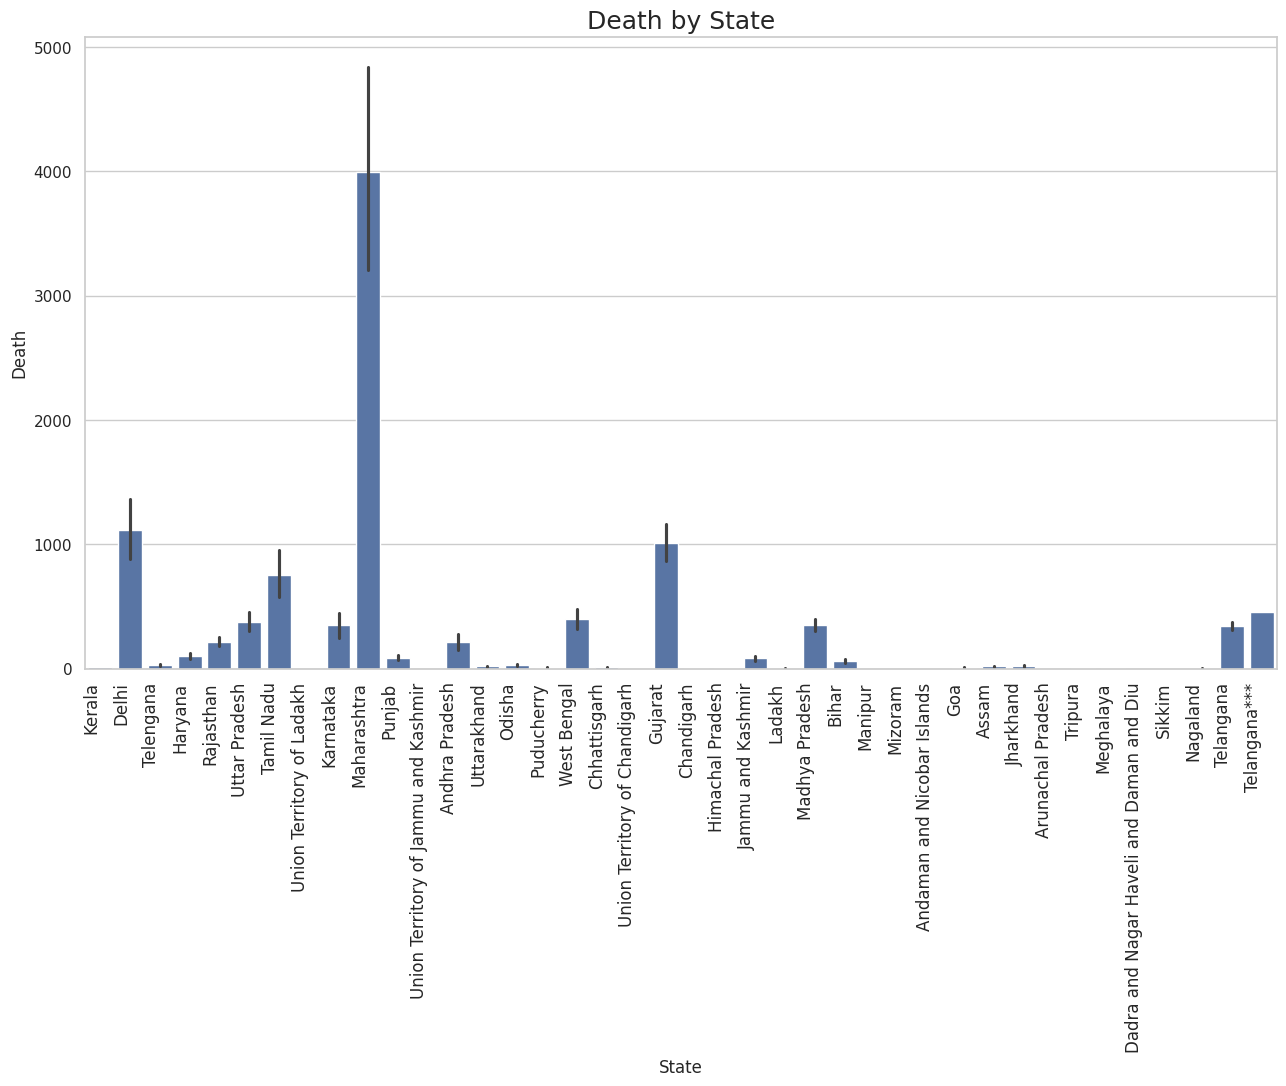

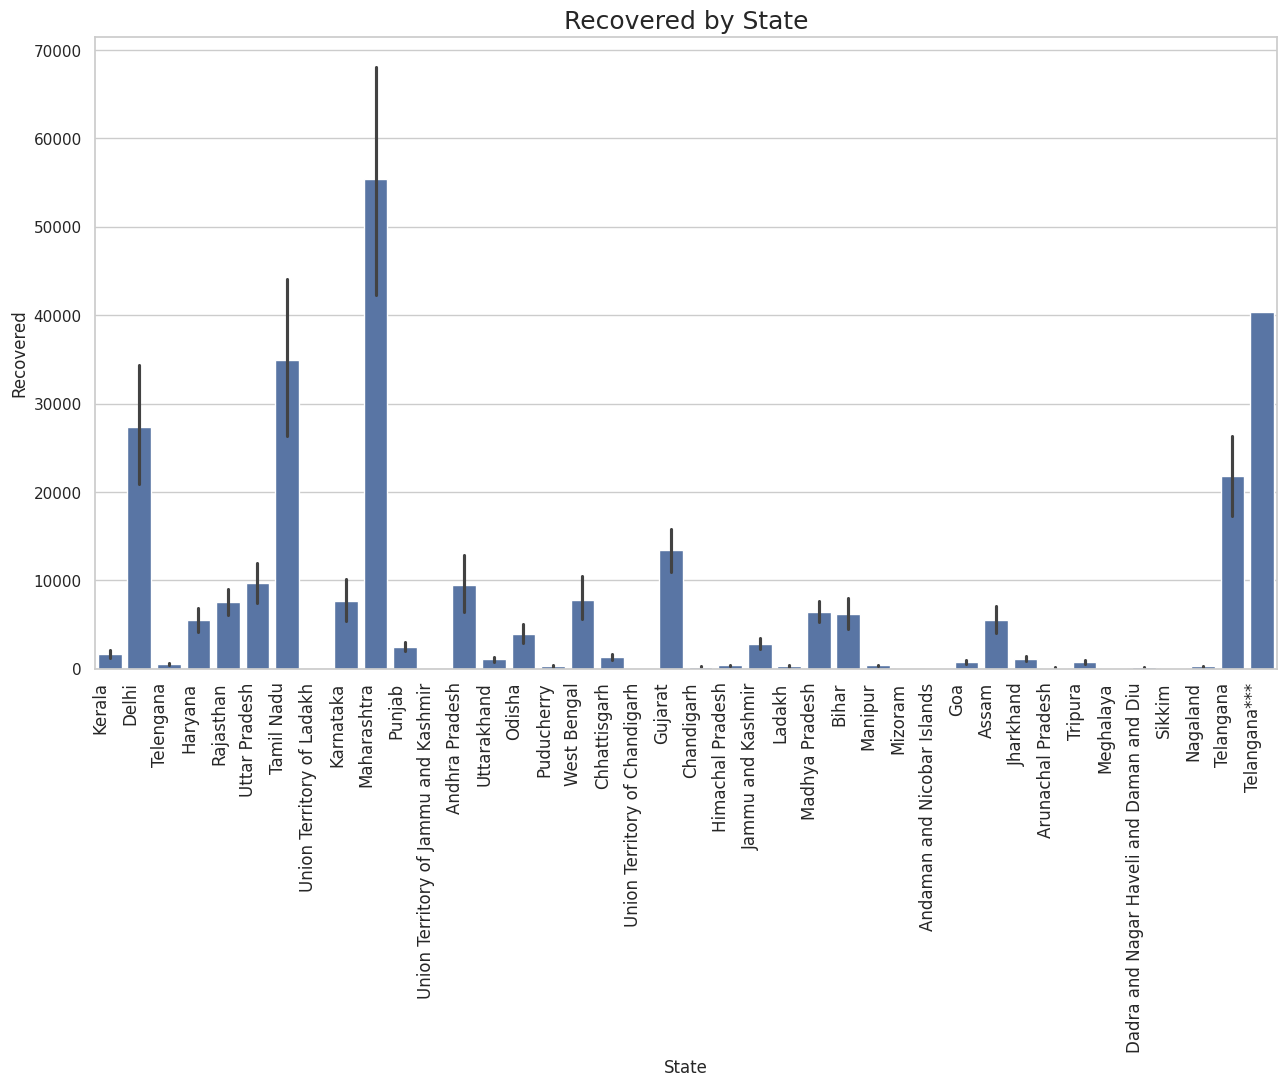

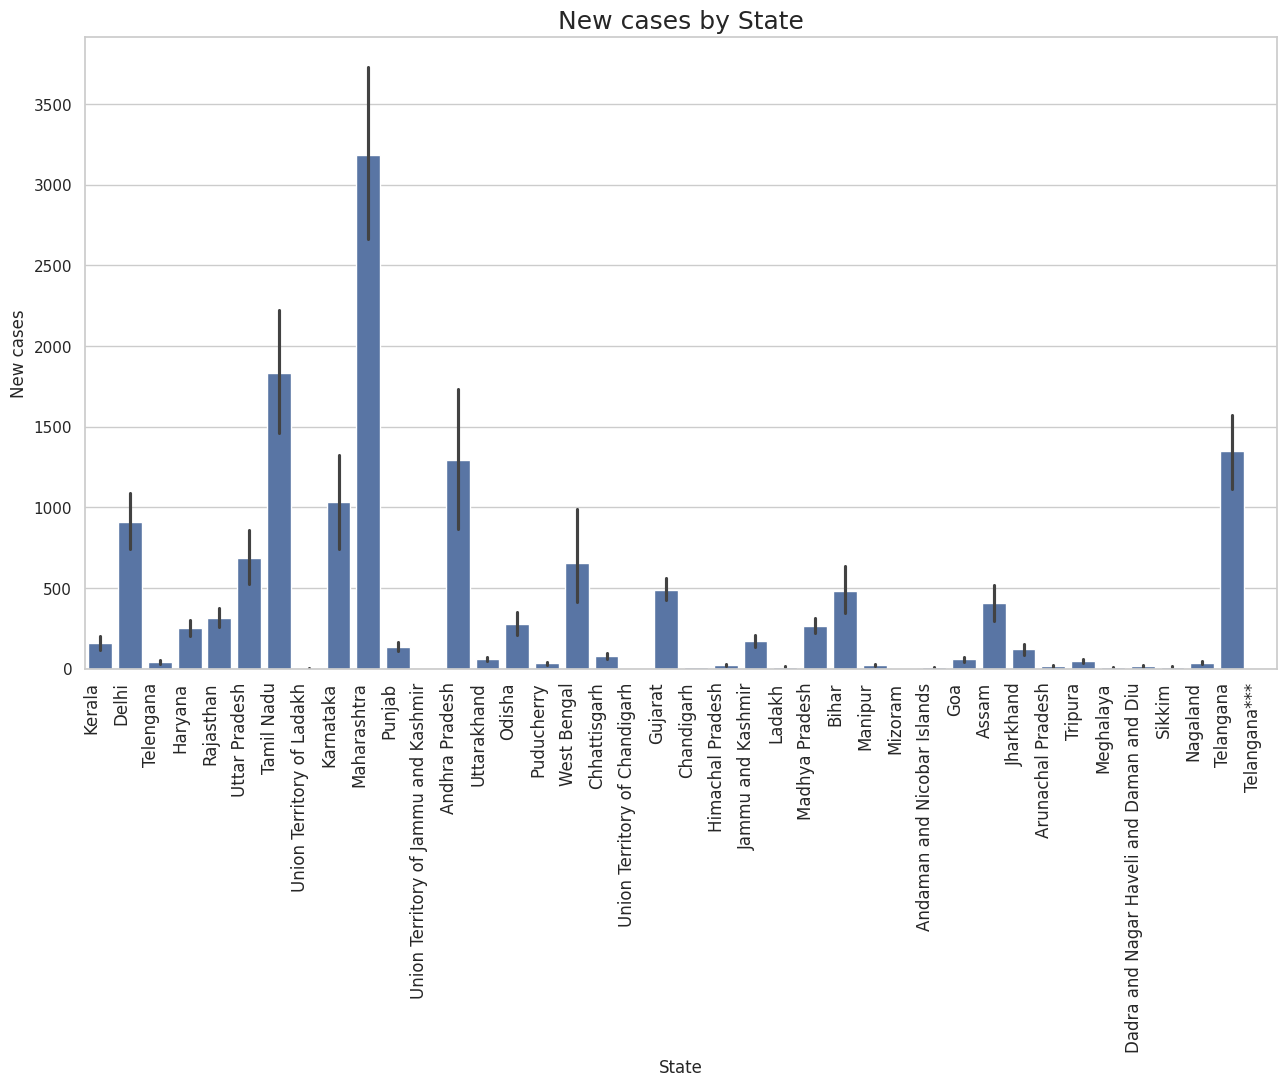

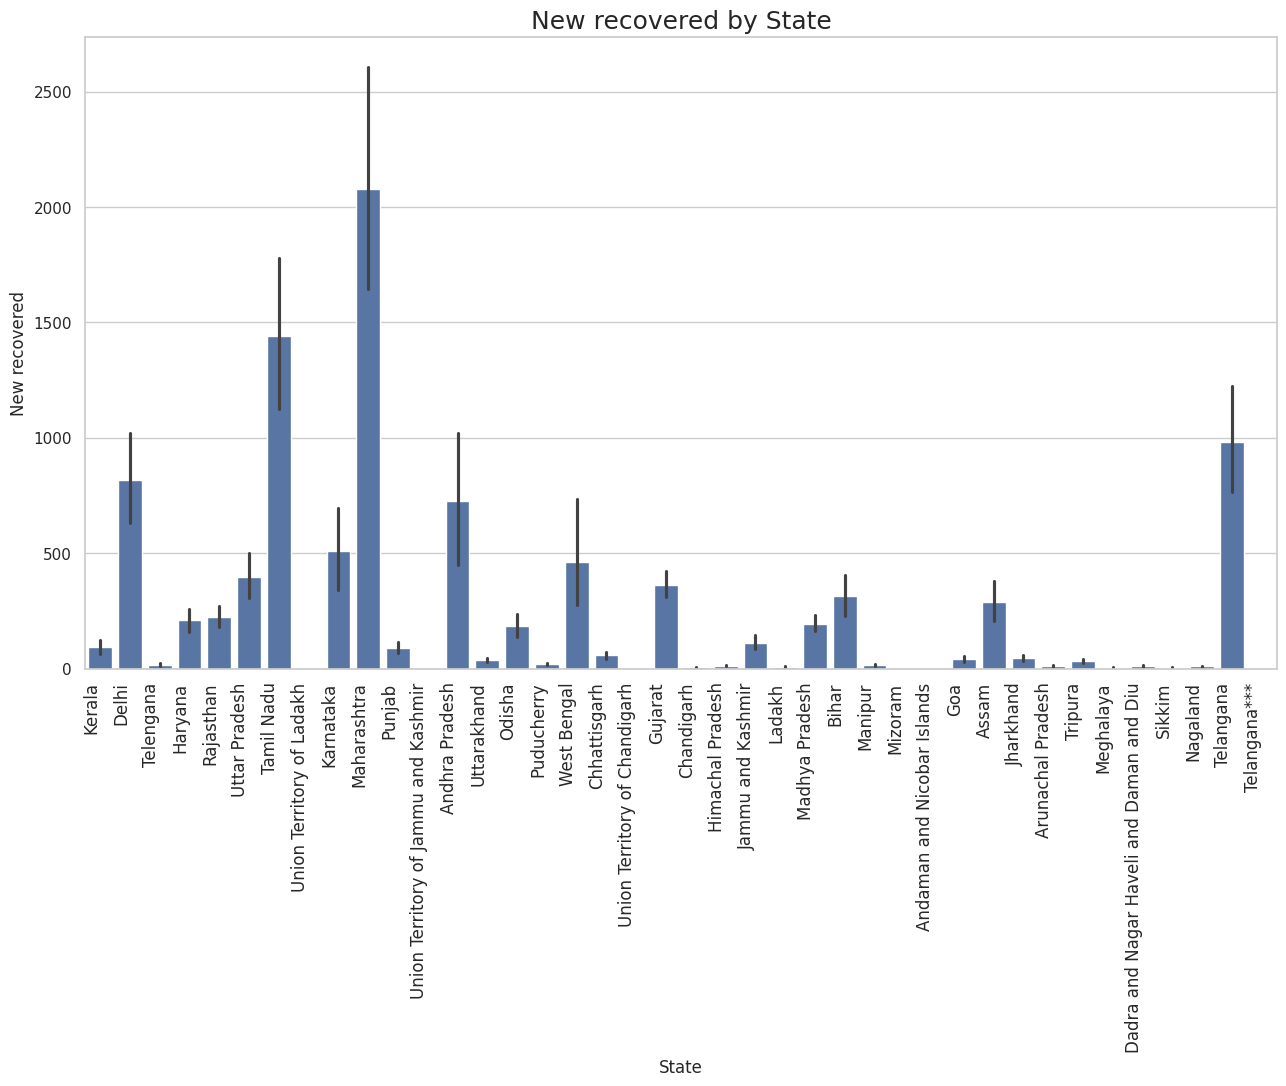

In [ ]:

metrics = ['Total confirmed cases', 'Death', 'Recovered', 'New cases', 'New recovered']

# Bar Plots for Metrics by State
for metric in metrics:
    plt.figure(figsize=(14, 12))
    sns.barplot(x='State', y=metric, data=df_cleaned)
    plt.title(f'{metric} by State', fontsize=18)
    plt.xticks(rotation=90, ha="right", fontsize=12)
    plt.tight_layout(pad=4.0)  # Adjusting padding for better spacing
    plt.show()
    print("\n")


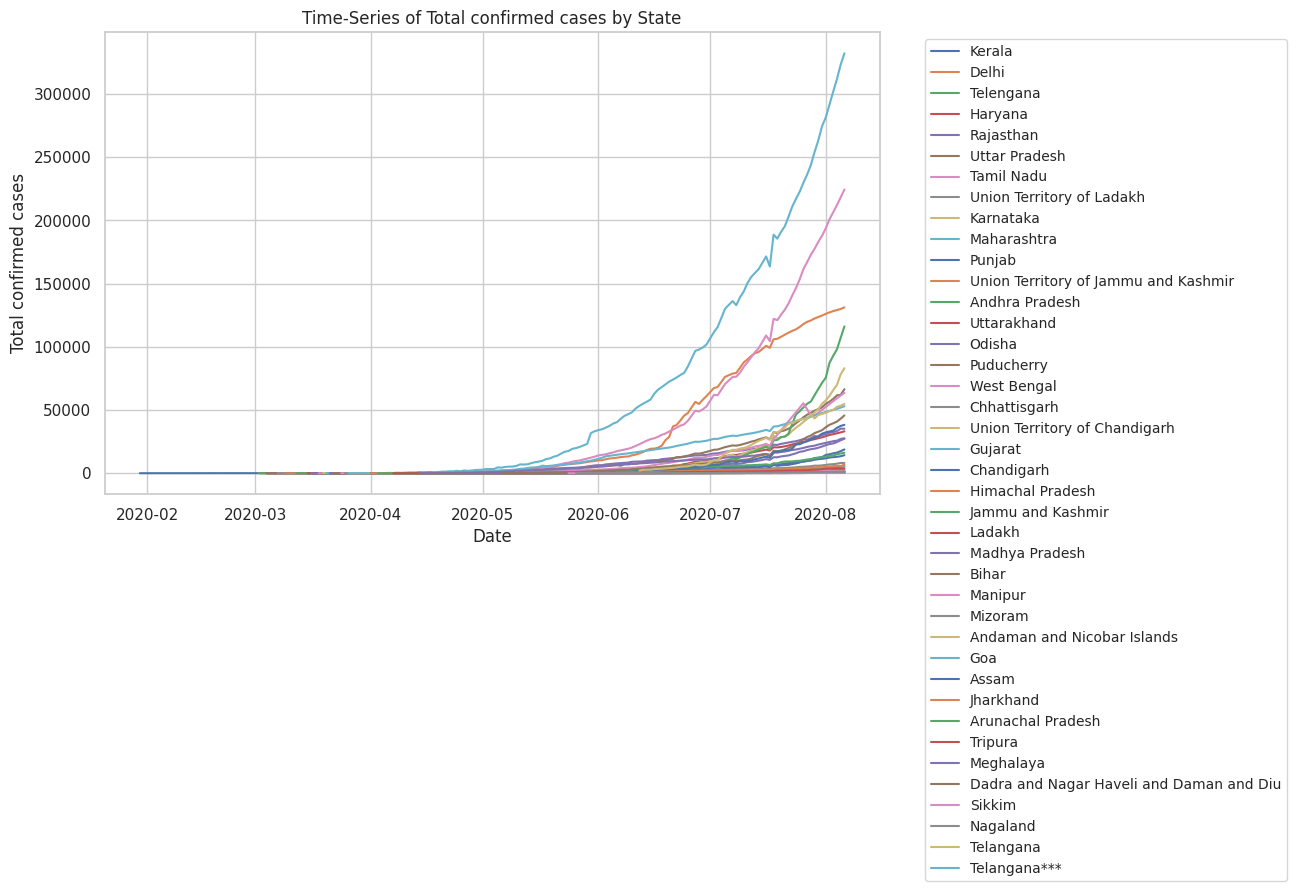

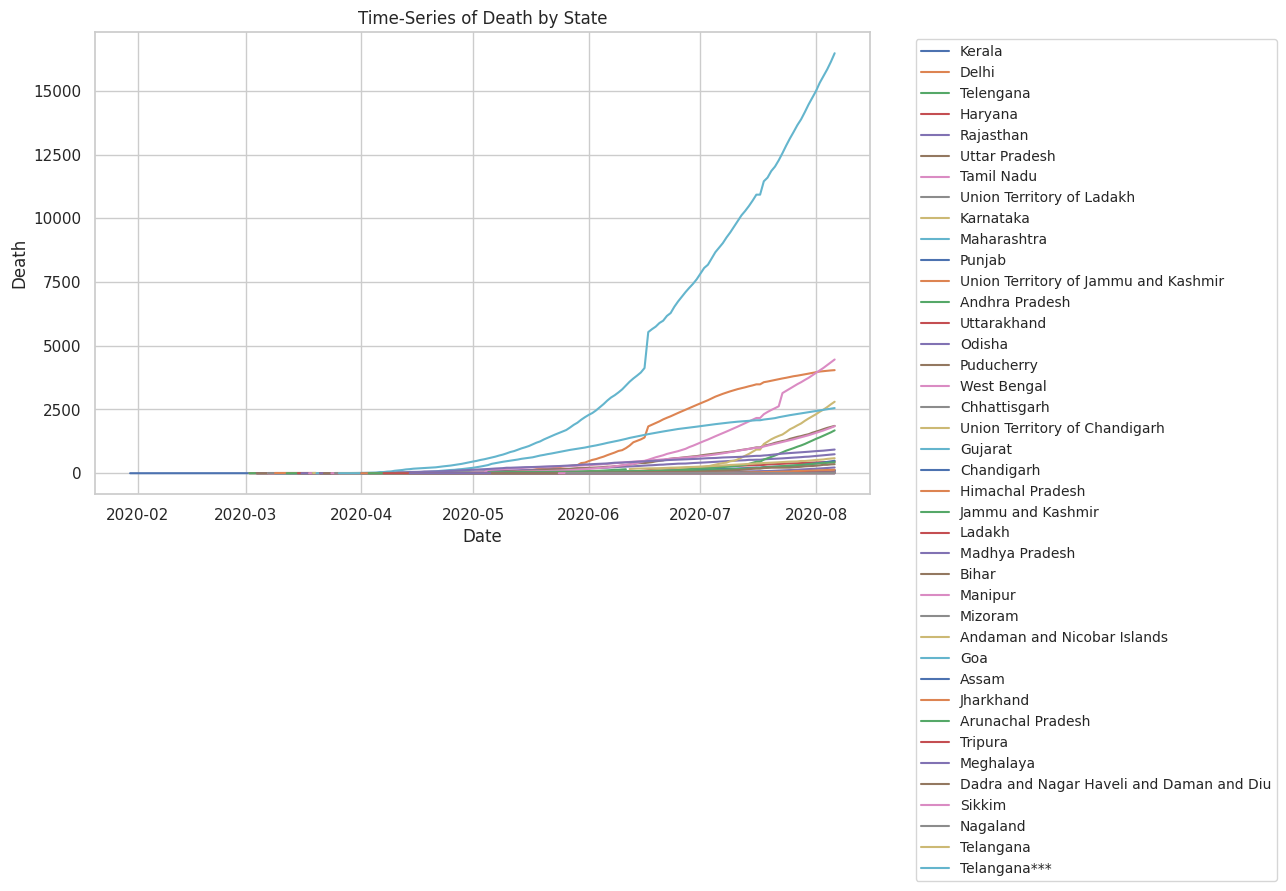

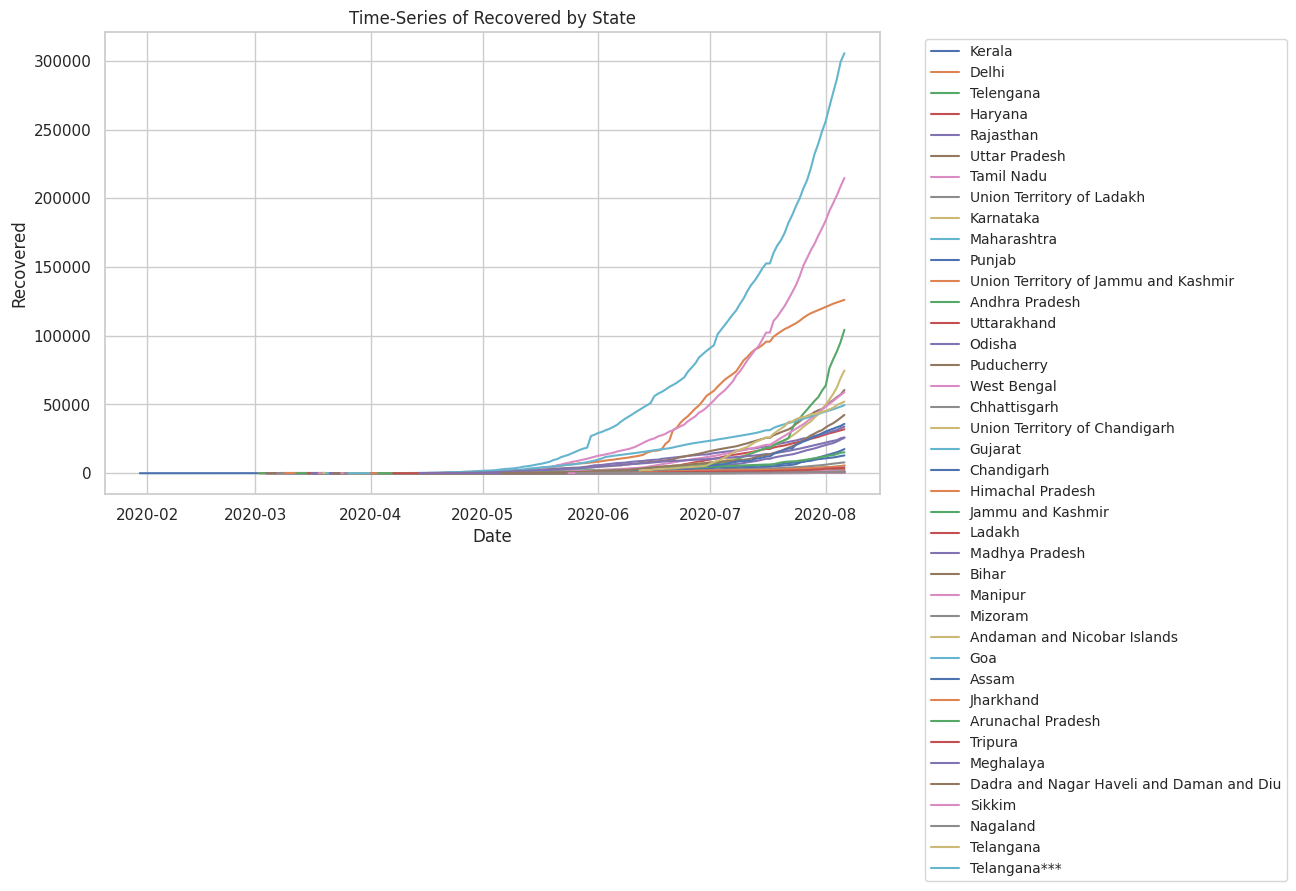

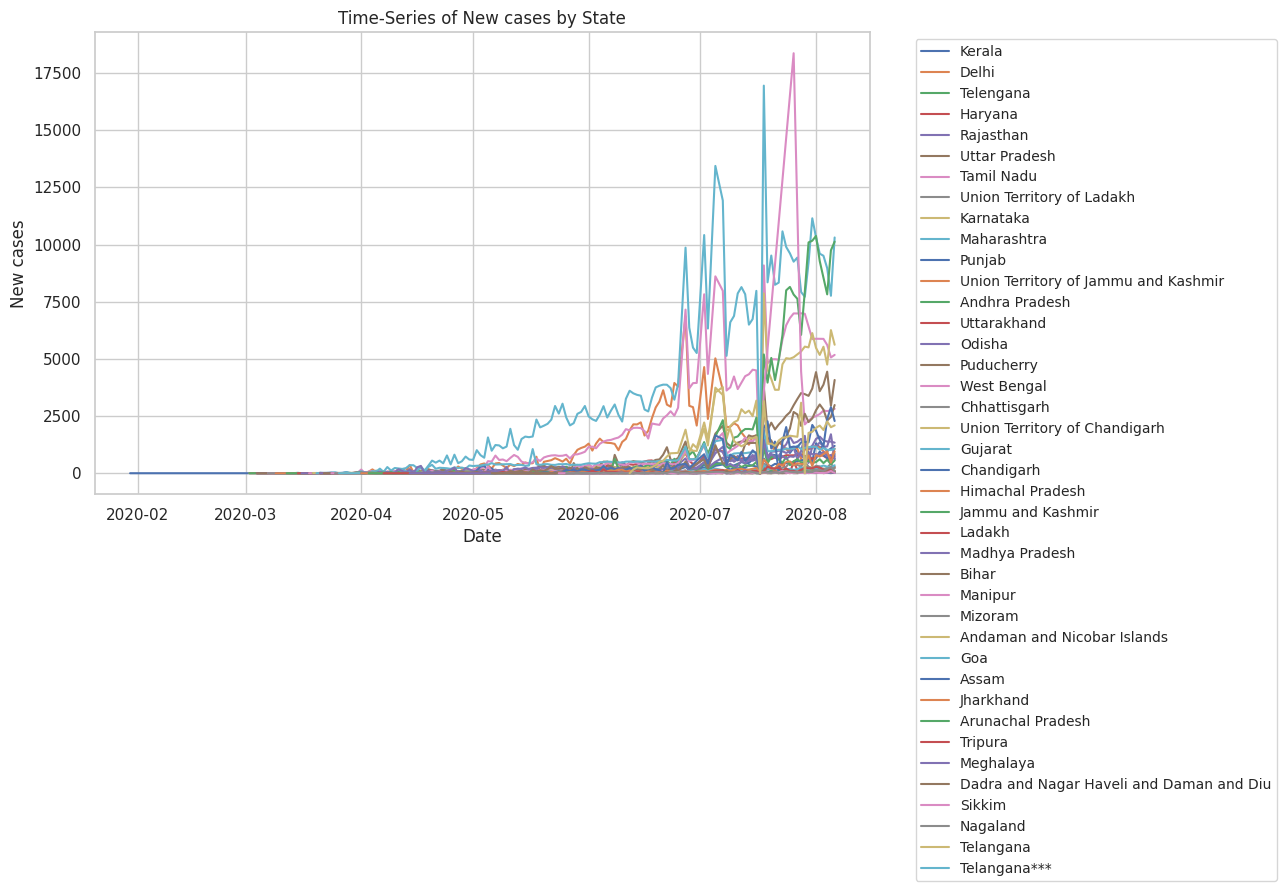

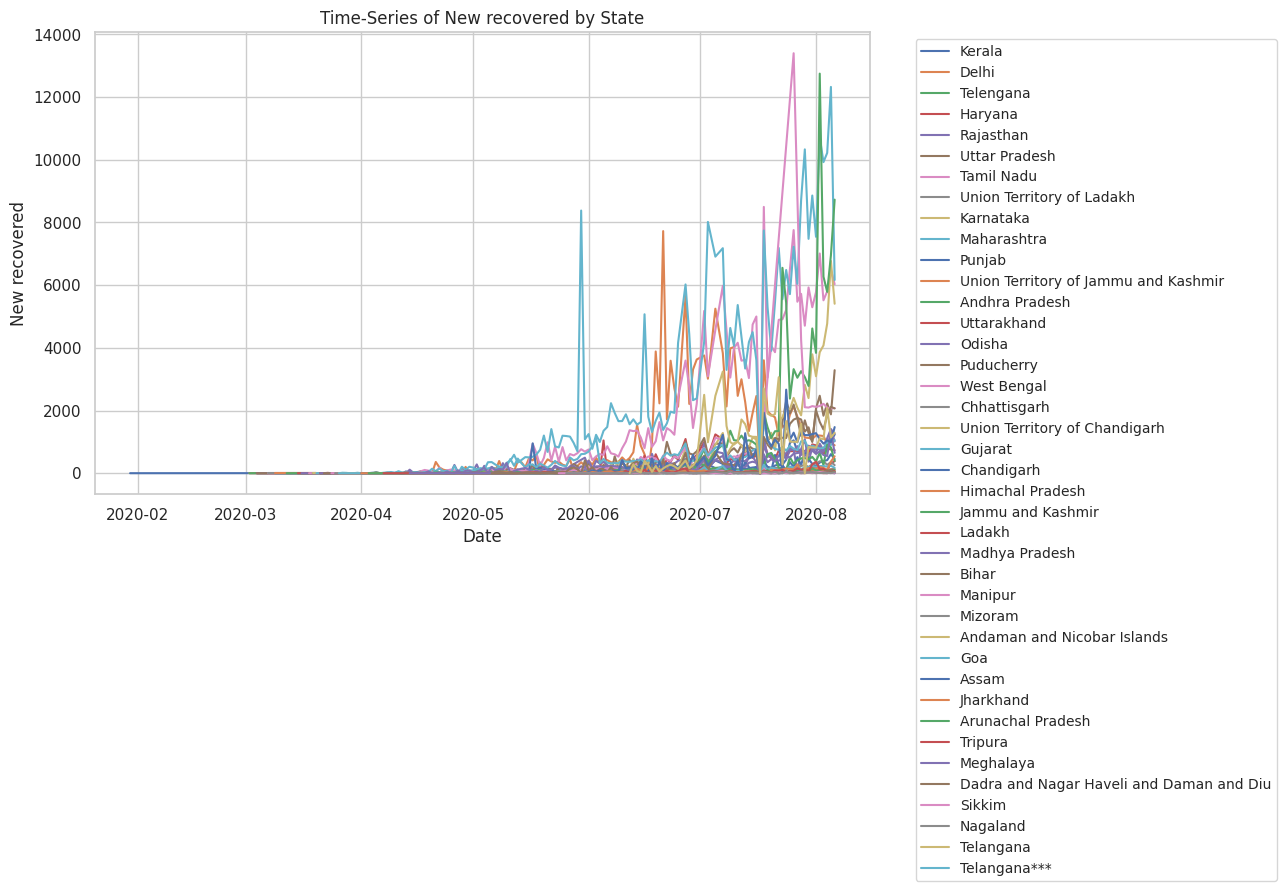

In [ ]:
# Time-Series Analysis
for metric in metrics:
    plt.figure(figsize=(10, 6))
    for state in df_cleaned['State'].unique():
        state_data = df_cleaned[df_cleaned['State'] == state]
        plt.plot(state_data['Date'], state_data[metric], label=state)
    plt.title(f'Time-Series of {metric} by State')
    plt.xlabel('Date')
    plt.ylabel(metric)
    plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize='small')
    plt.show()
    print("\n")


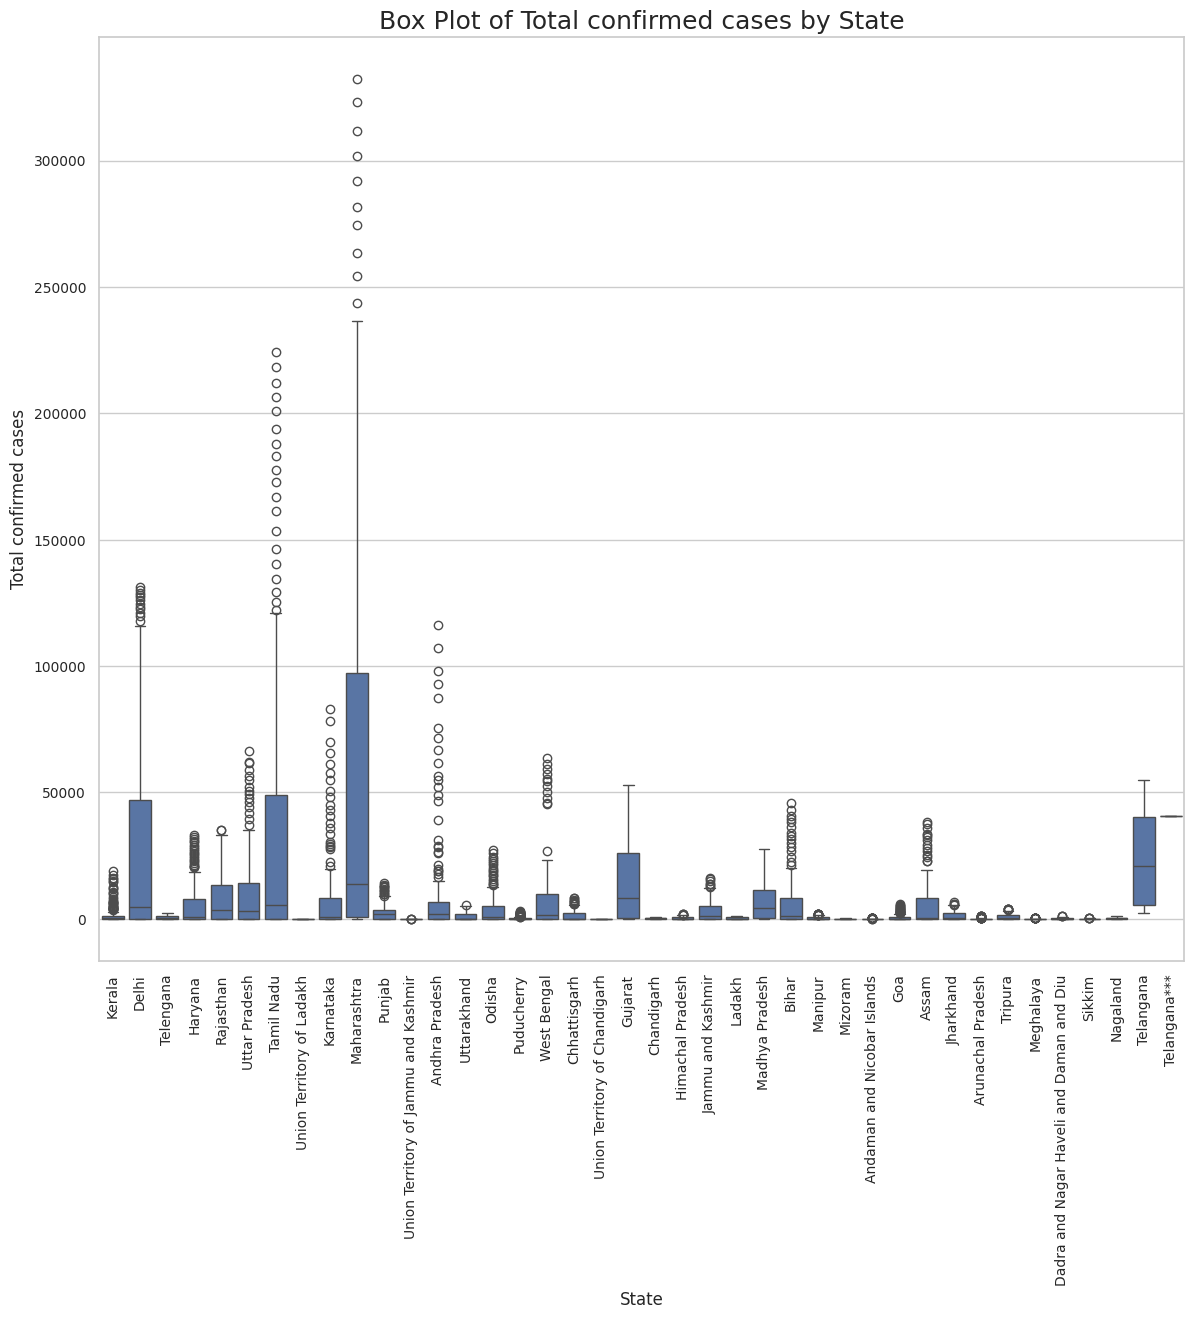

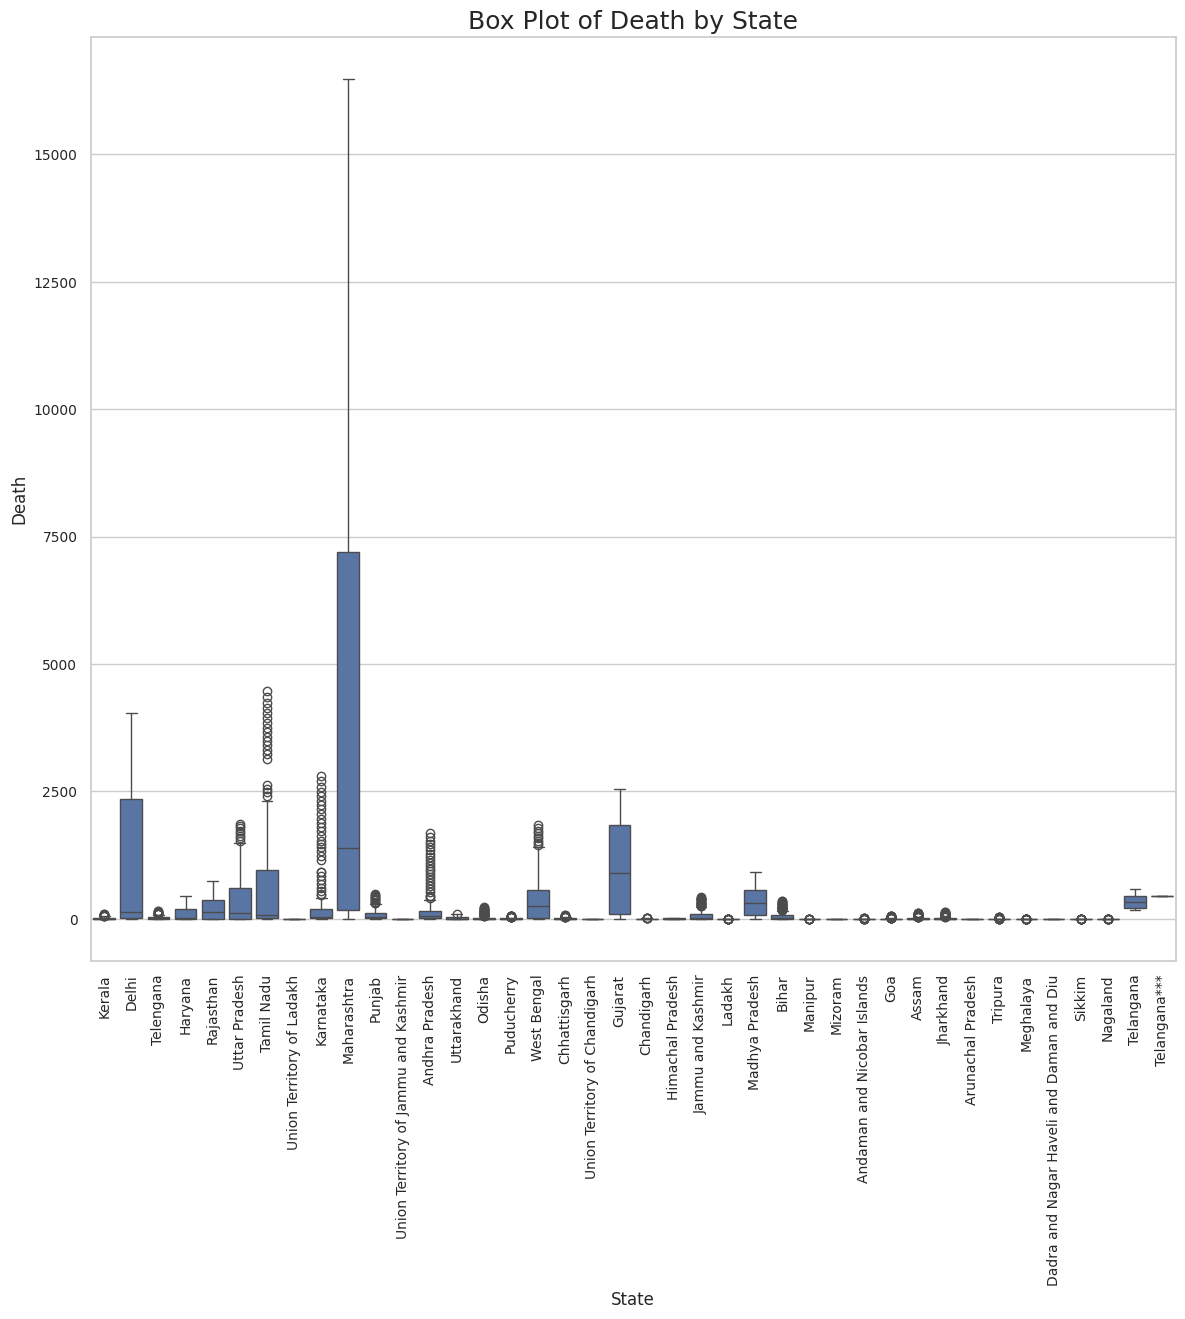

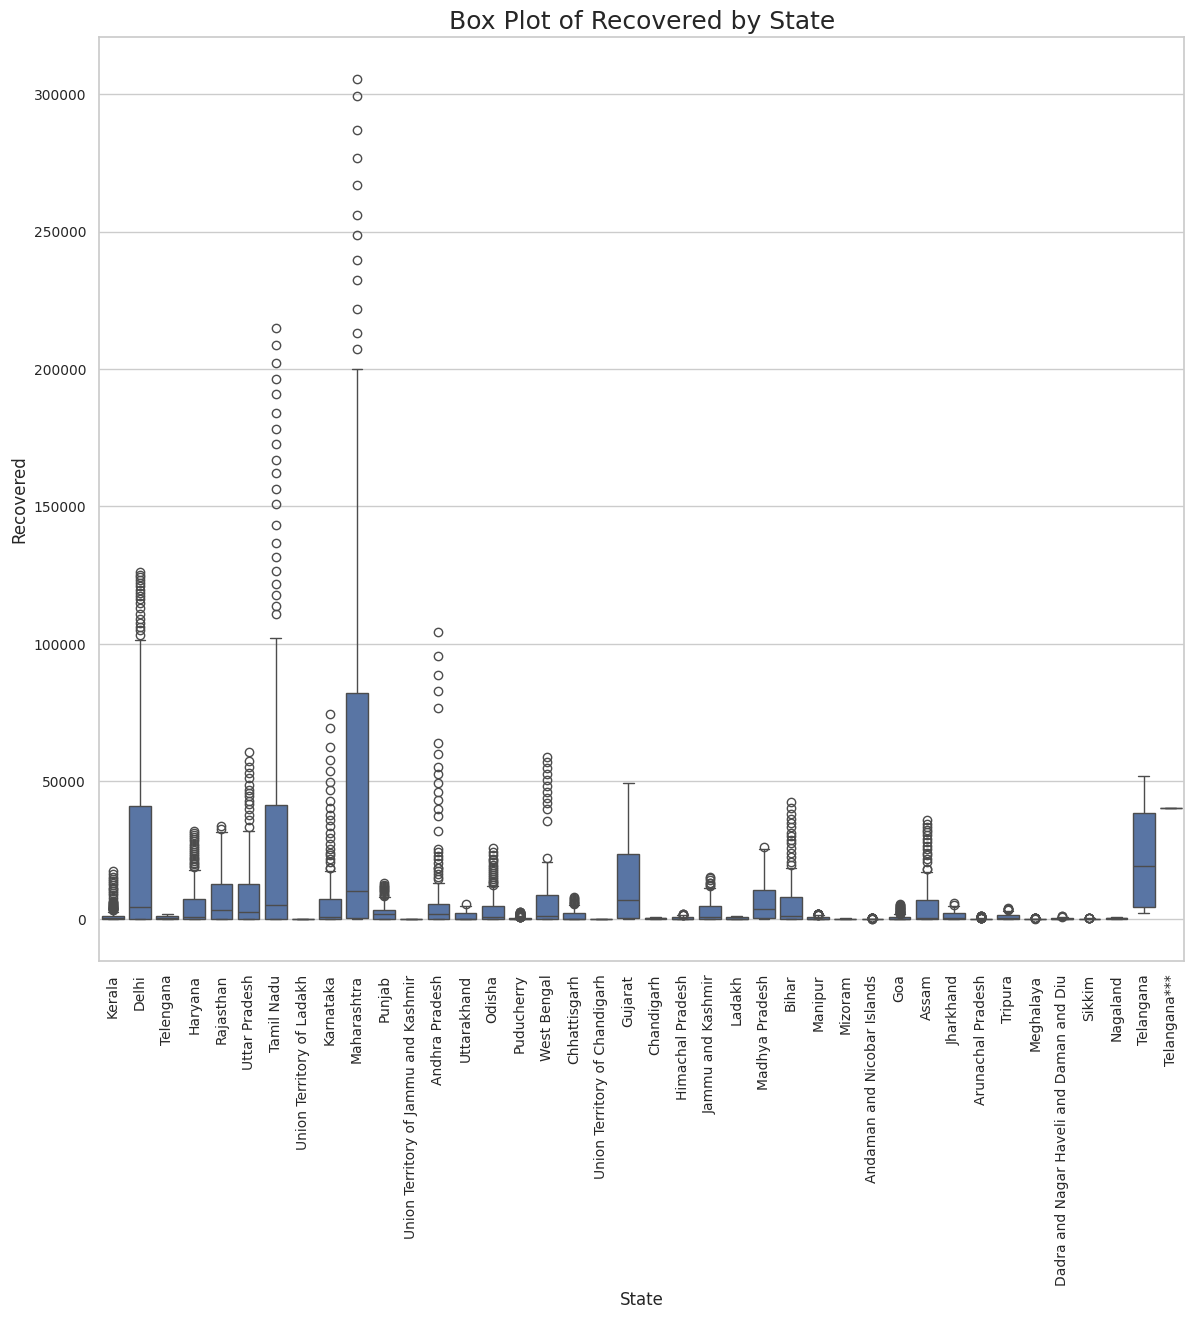

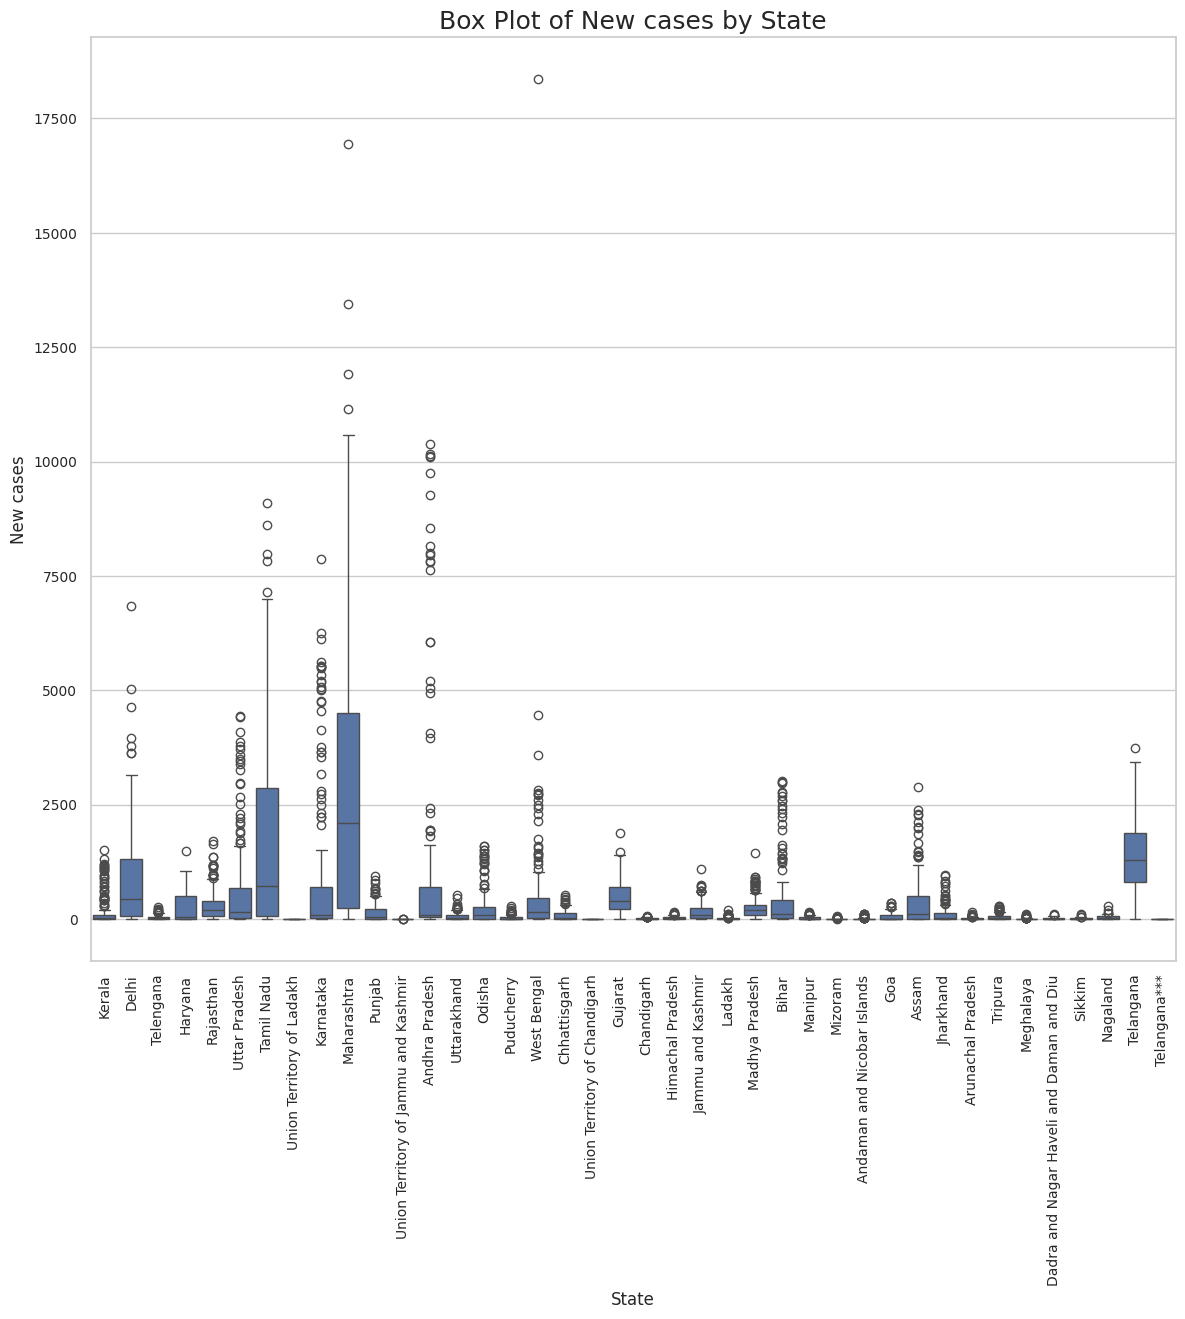

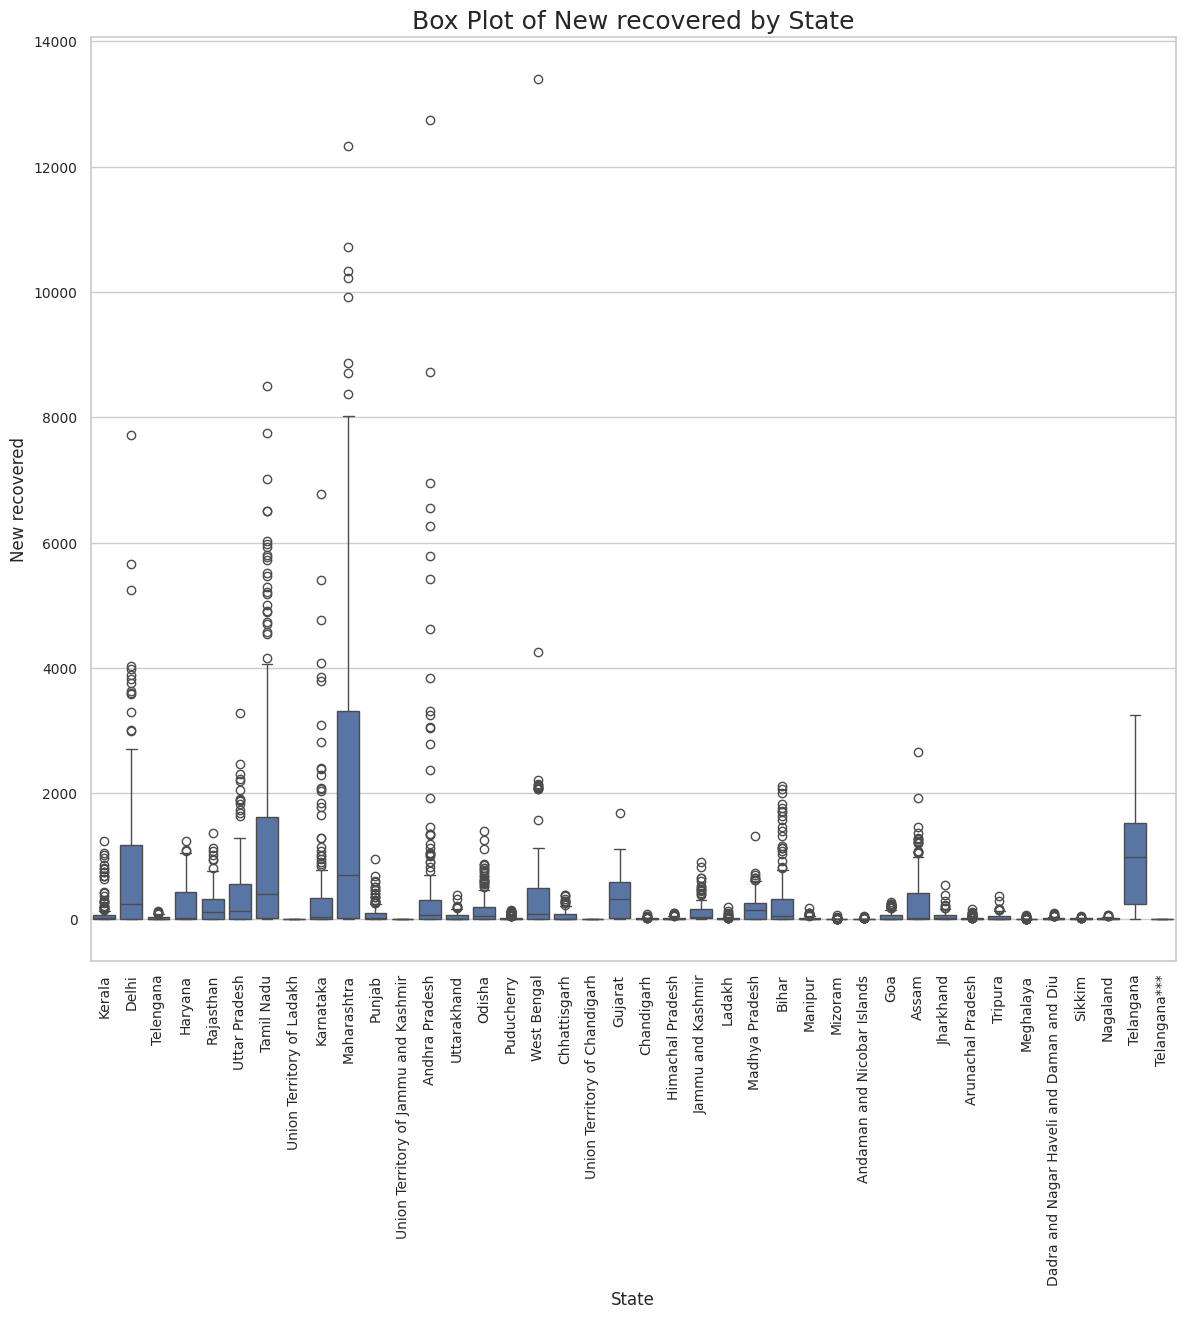

In [ ]:
# Box Plots for Total and Metrics by State
for metric in metrics:
    plt.figure(figsize=(14, 12))
    sns.boxplot(x='State', y=metric, data=df_cleaned)
    plt.title(f'Box Plot of {metric} by State', fontsize=18)
    plt.xticks(rotation=90, fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()
    print("\n")

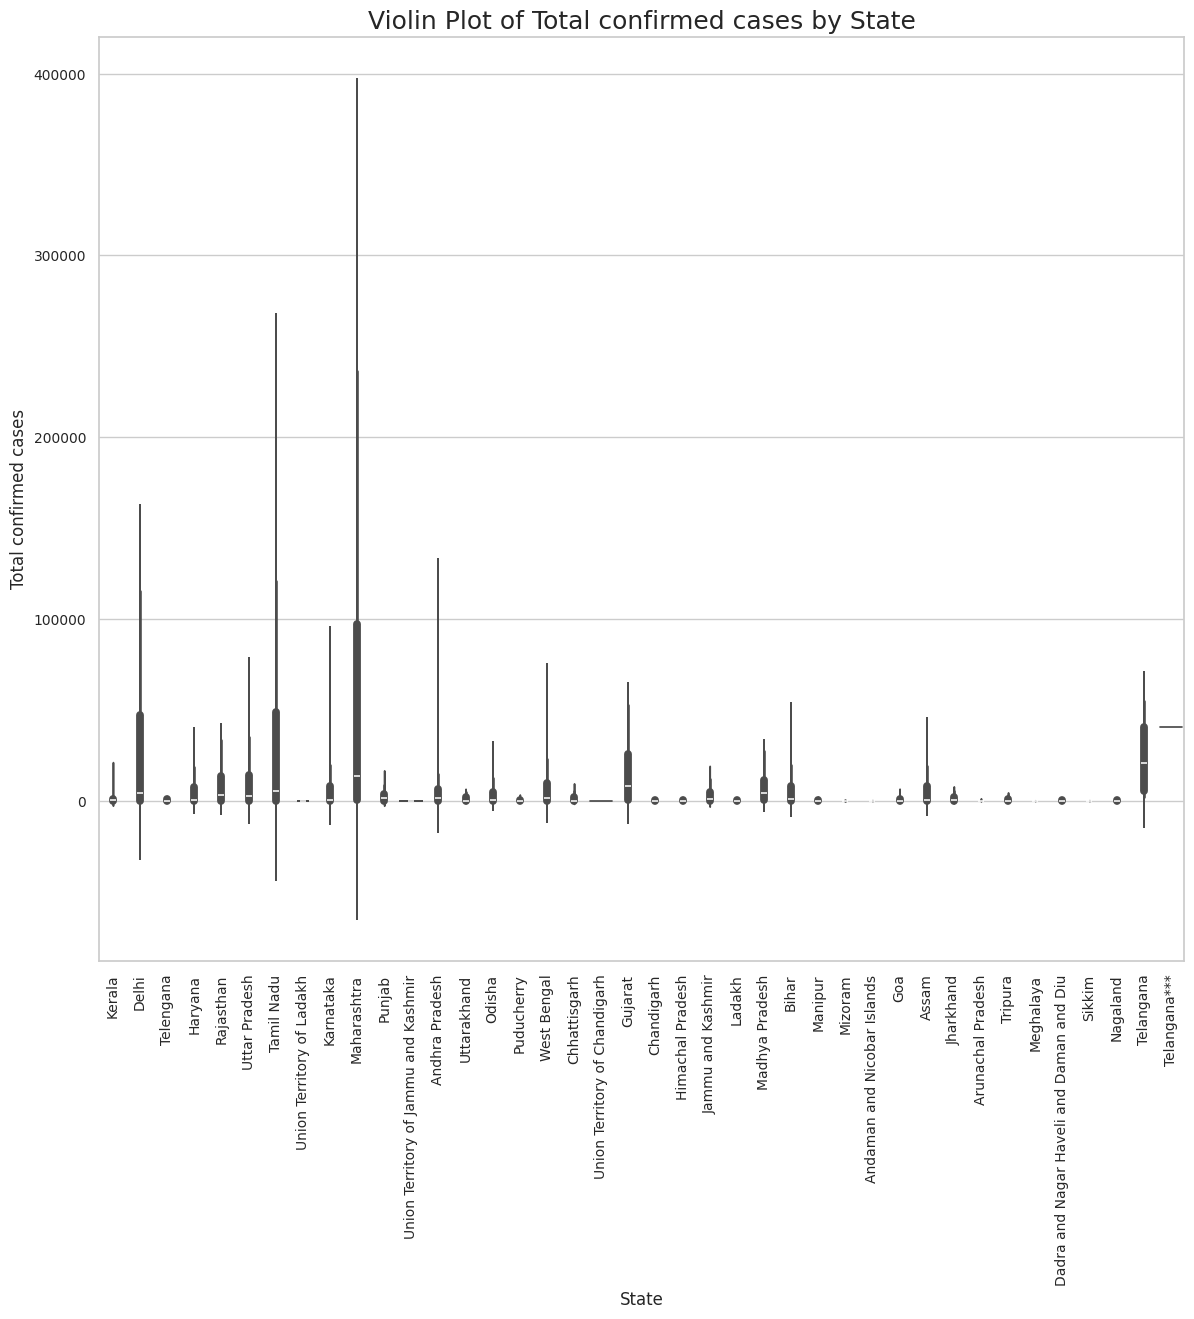

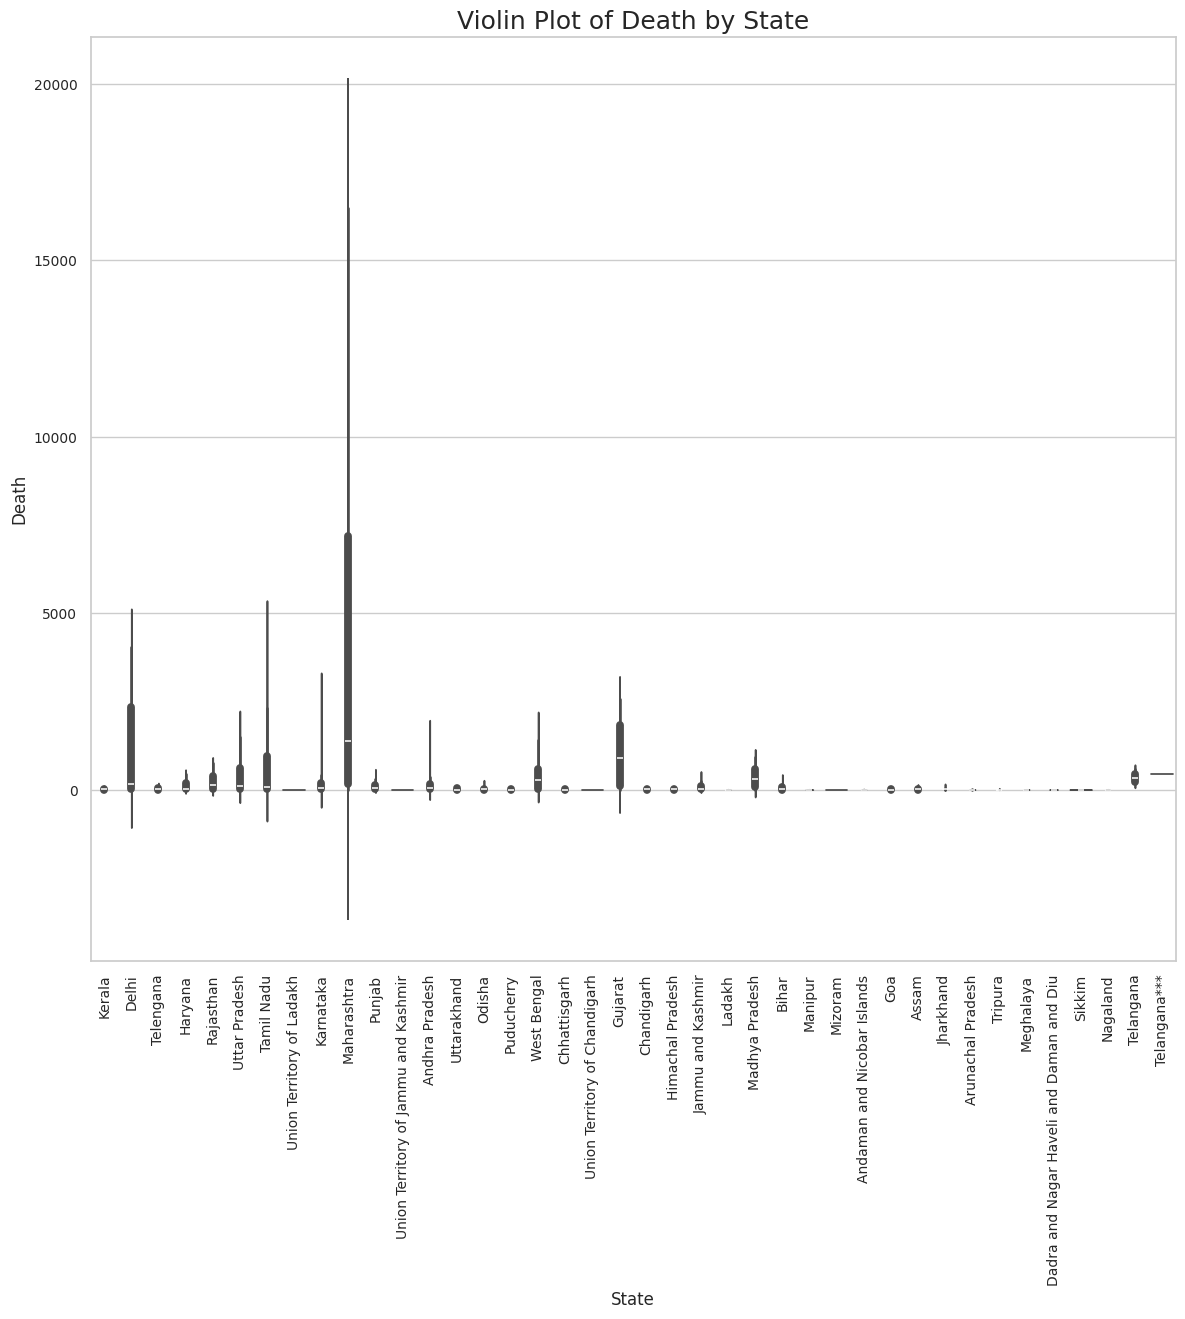

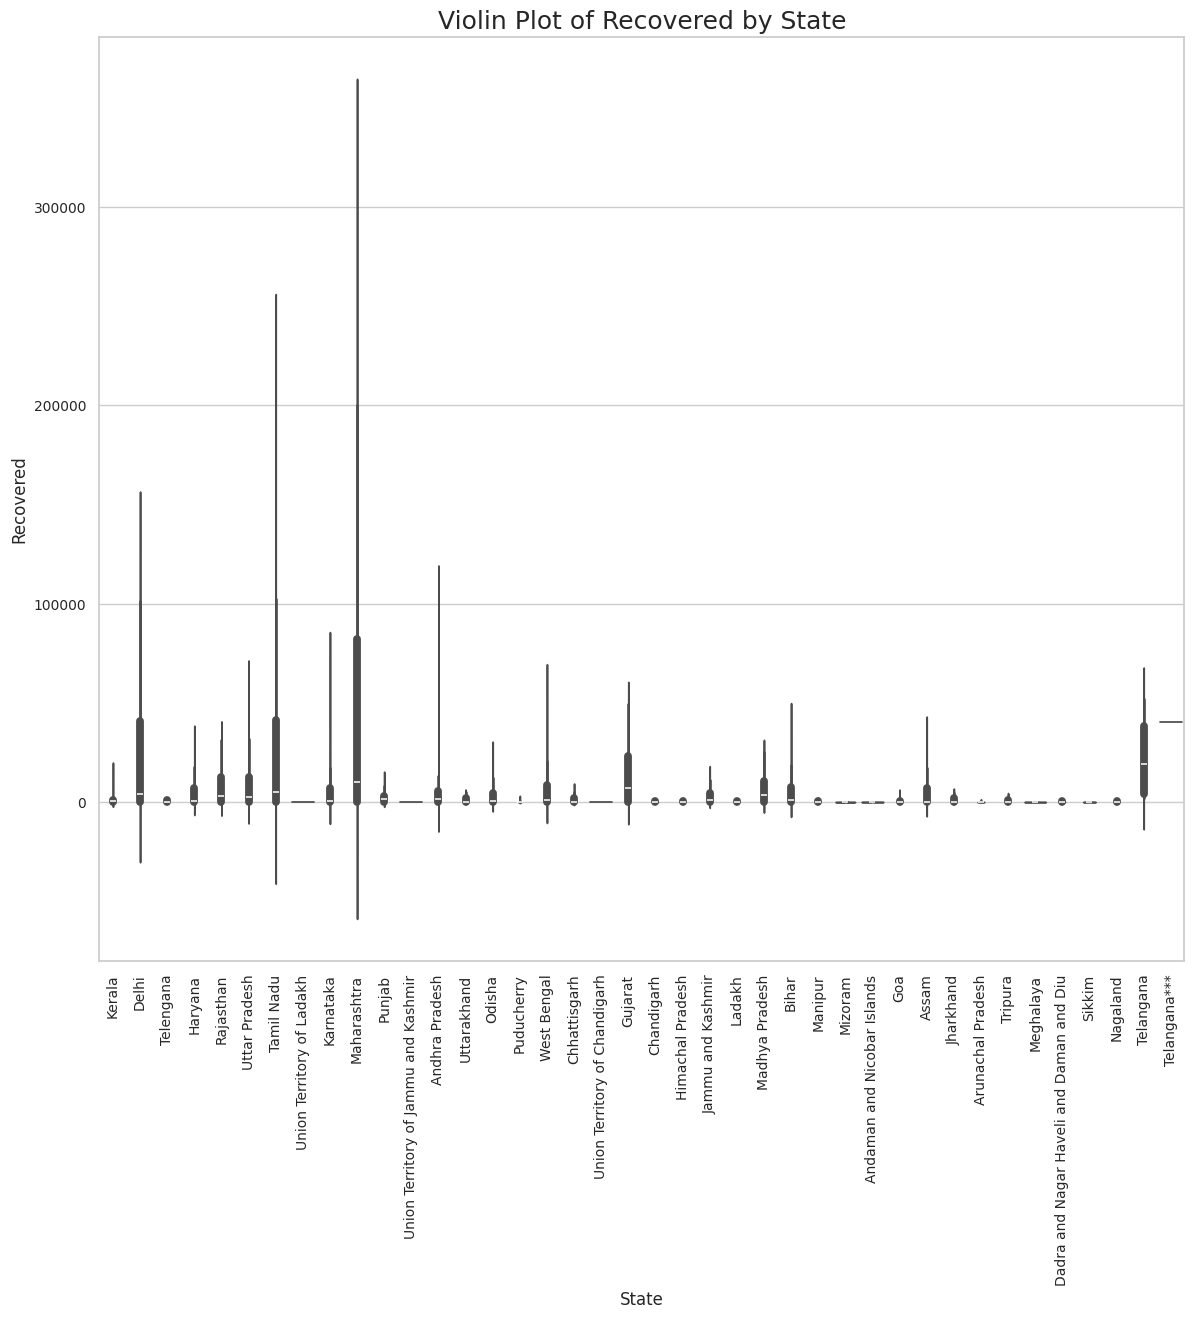

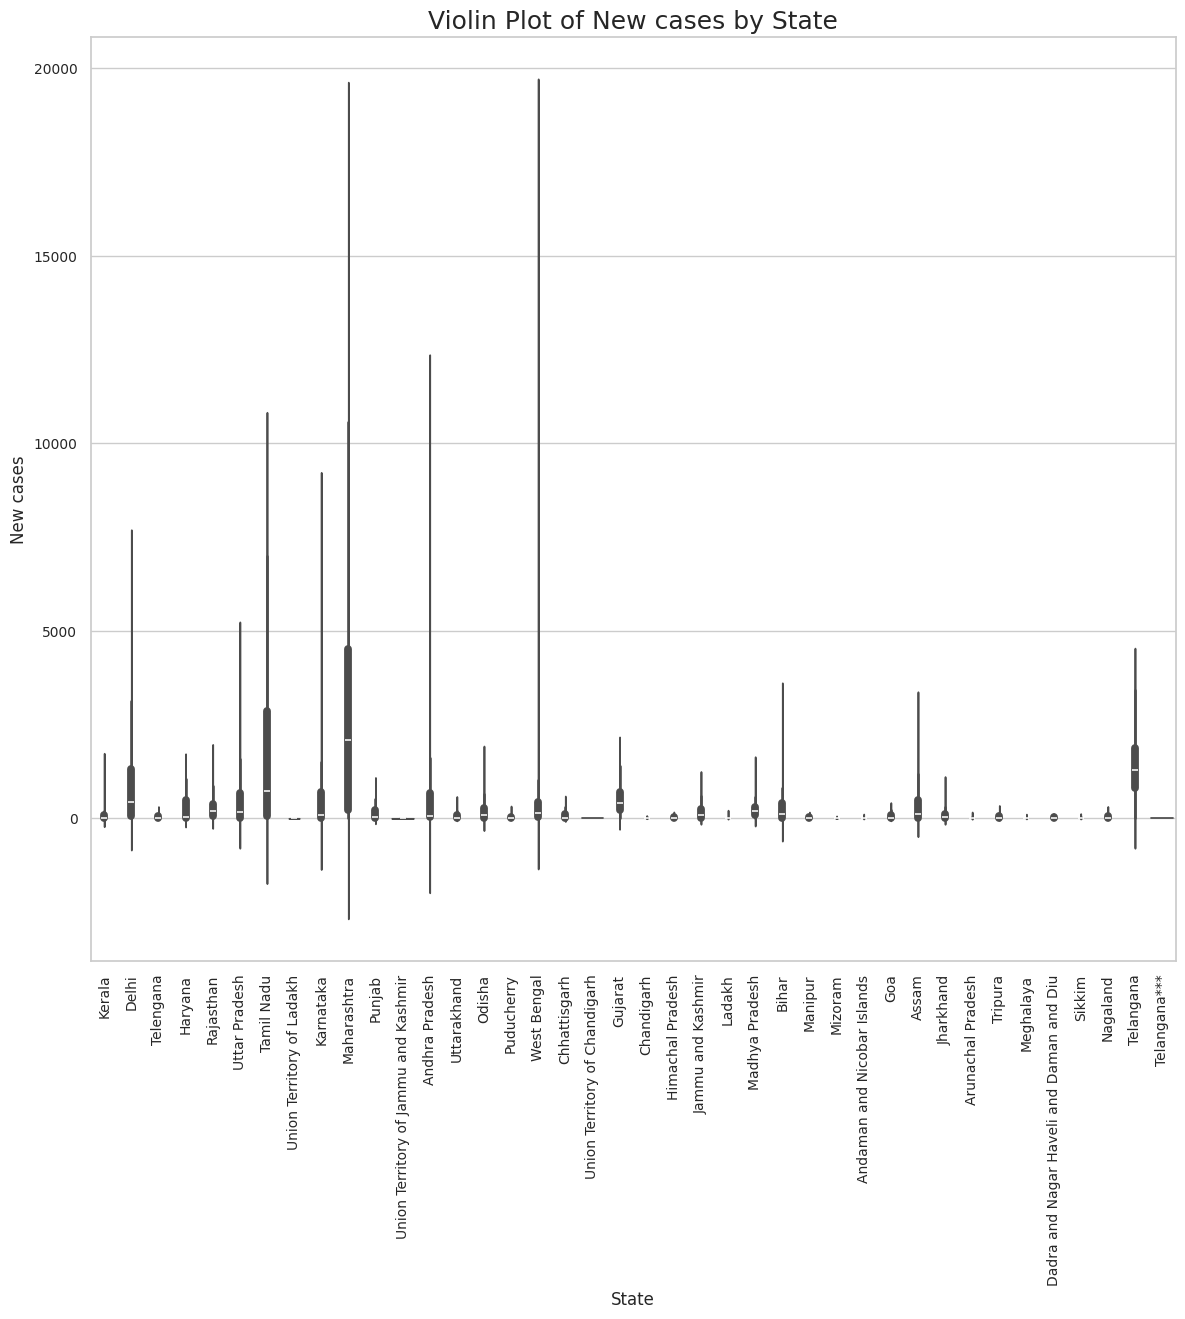

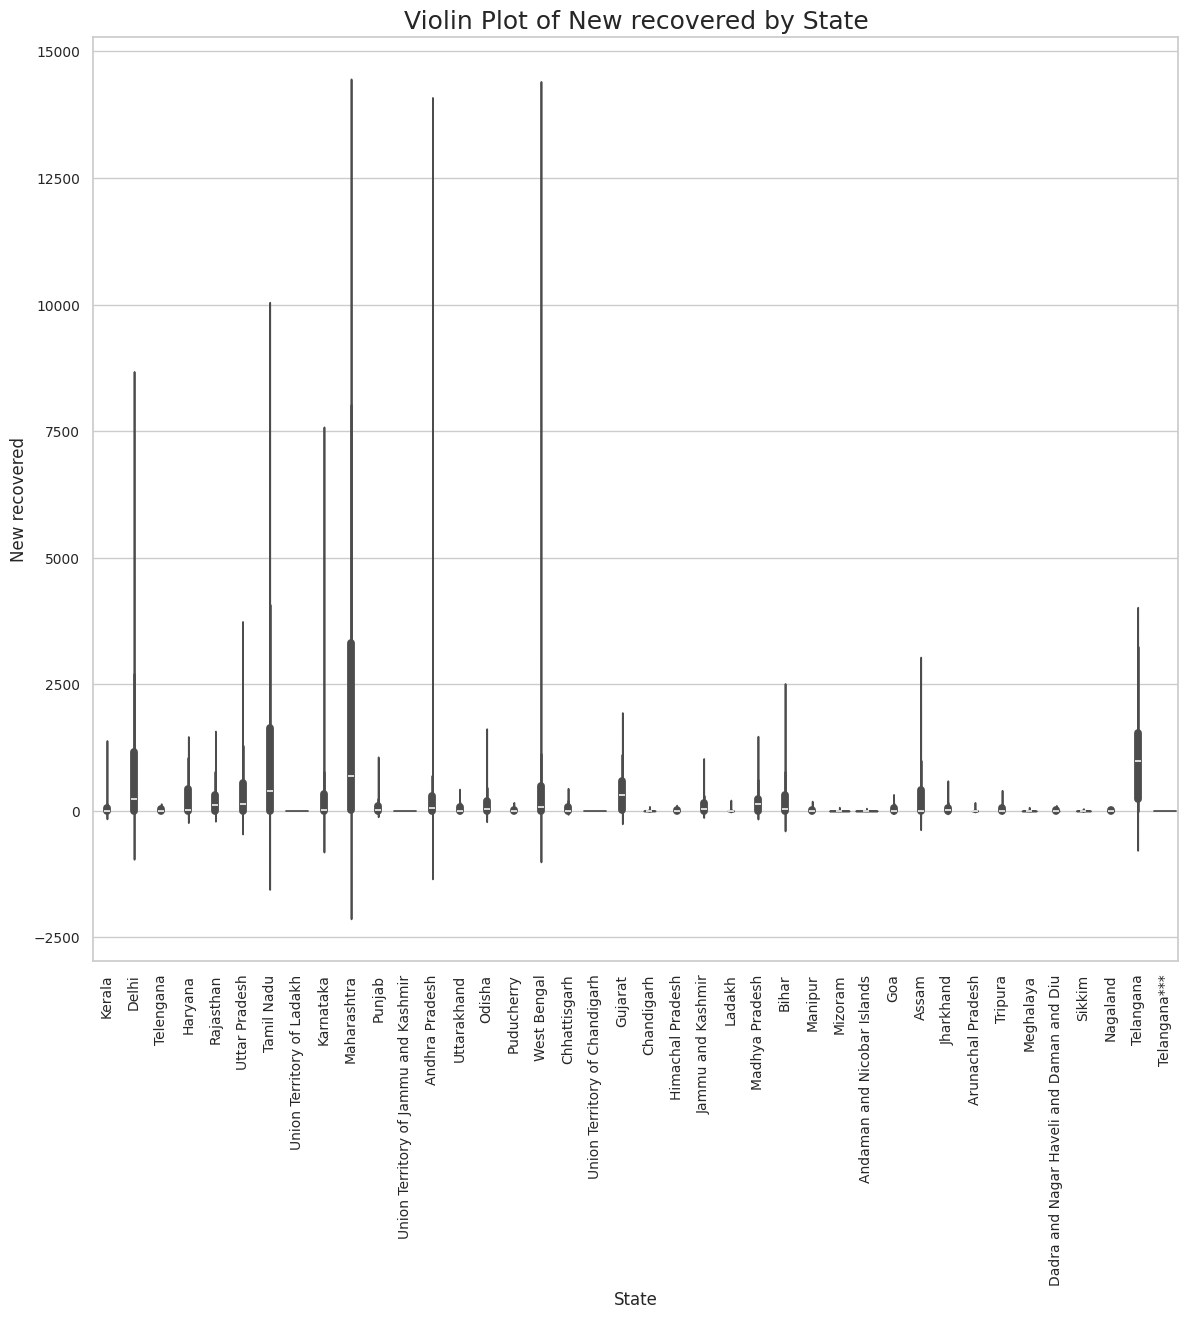

In [ ]:
# Violin Plots for Total and Metrics by State
for metric in metrics:
    plt.figure(figsize=(14,12))
    sns.violinplot(x='State', y=metric, data=df_cleaned)
    plt.title(f'Violin Plot of {metric} by State', fontsize=18)
    plt.xticks(rotation=90, fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()
    print("\n")


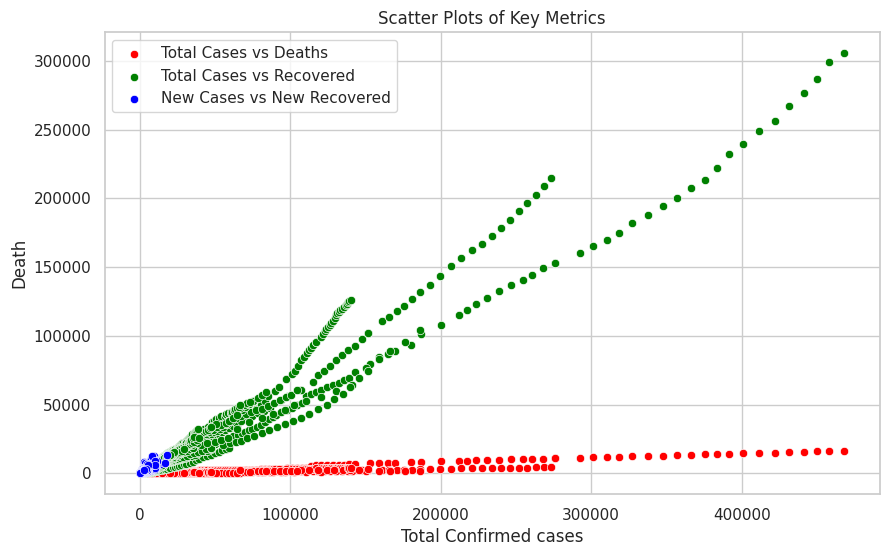

In [ ]:
# Scatter Plot to Explore Relationships
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Confirmed cases', y='Death', data=df_cleaned, label='Total Cases vs Deaths', color='red')
sns.scatterplot(x='Total Confirmed cases', y='Recovered', data=df_cleaned, label='Total Cases vs Recovered', color='green')
sns.scatterplot(x='New cases', y='New recovered', data=df_cleaned, label='New Cases vs New Recovered', color='blue')
plt.title('Scatter Plots of Key Metrics')
plt.legend()
plt.show()
print("\n")


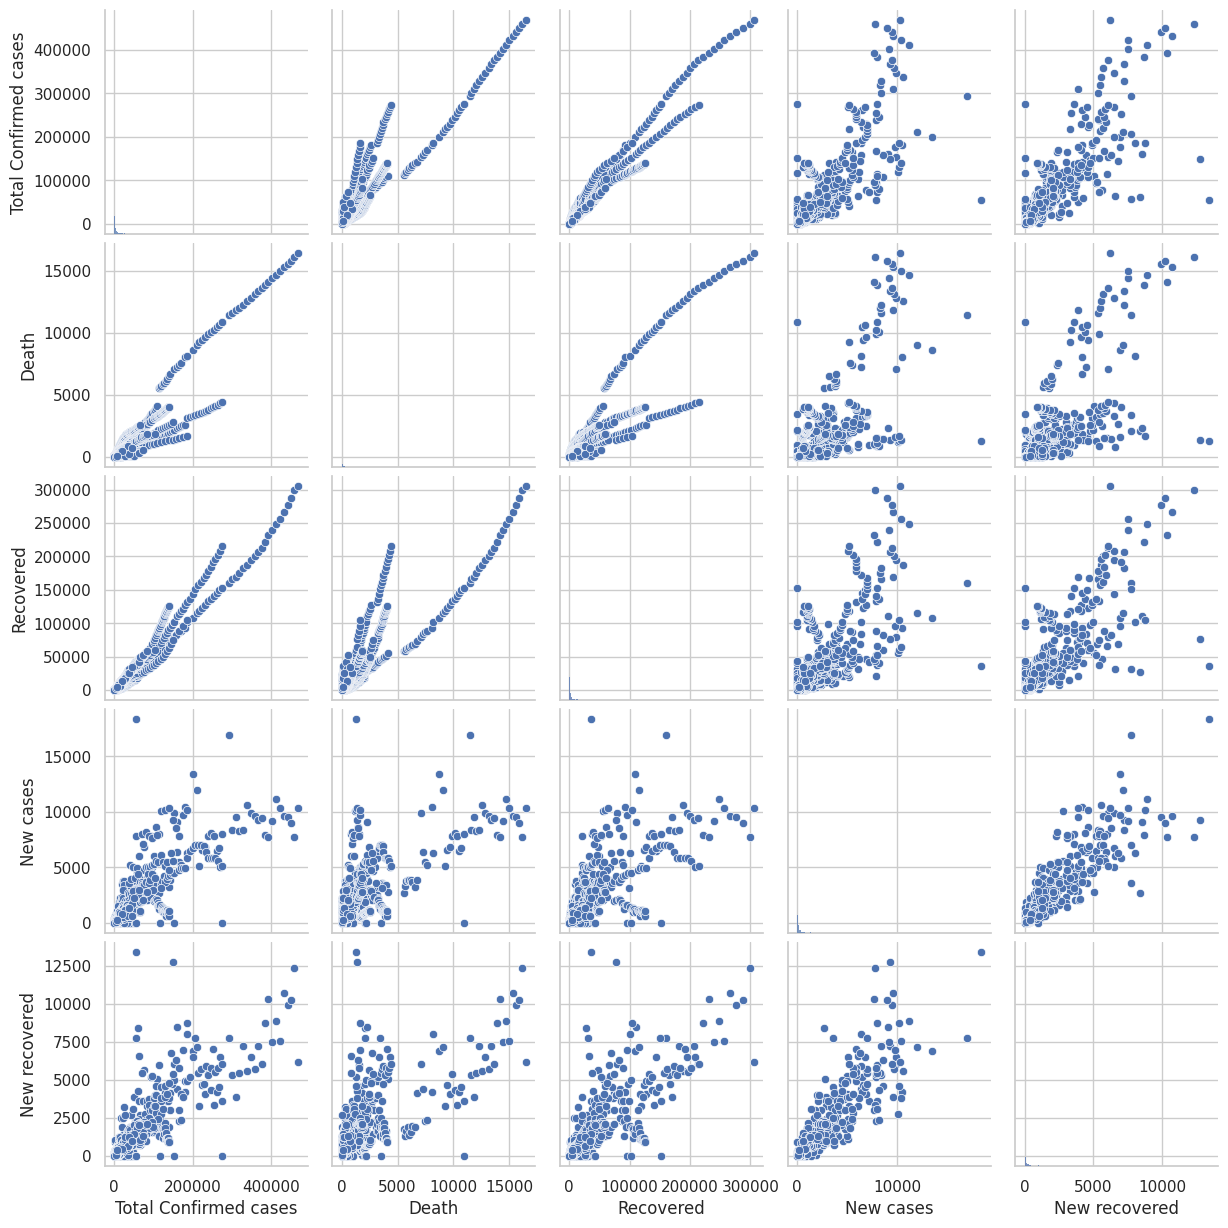

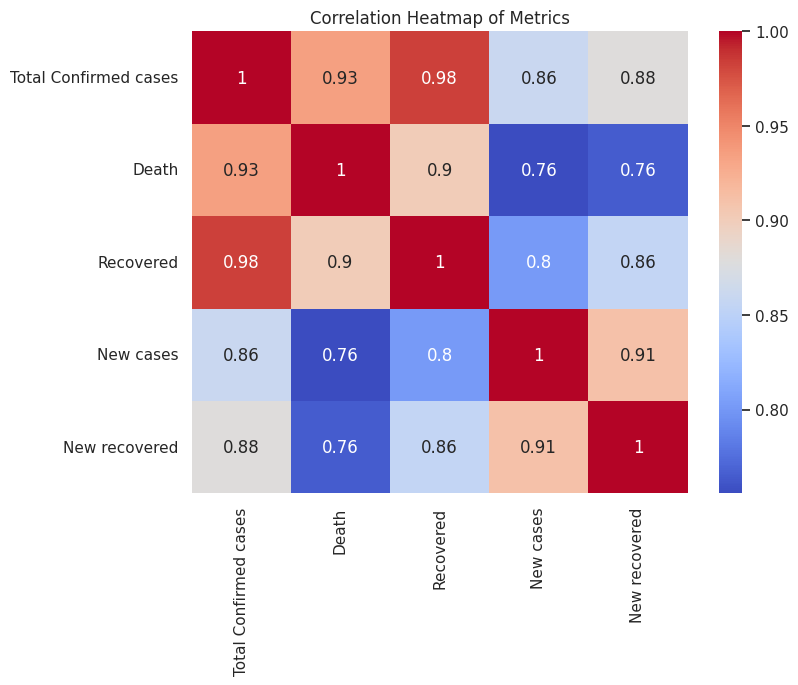

In [ ]:
# Pair Plot for Total and New Metrics
sns.pairplot(df_cleaned[['Total Confirmed cases', 'Death', 'Recovered', 'New cases', 'New recovered']])
plt.show()
print("\n")

# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_cleaned[['Total Confirmed cases', 'Death', 'Recovered', 'New cases', 'New recovered']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Metrics')
plt.show()
print("\n")


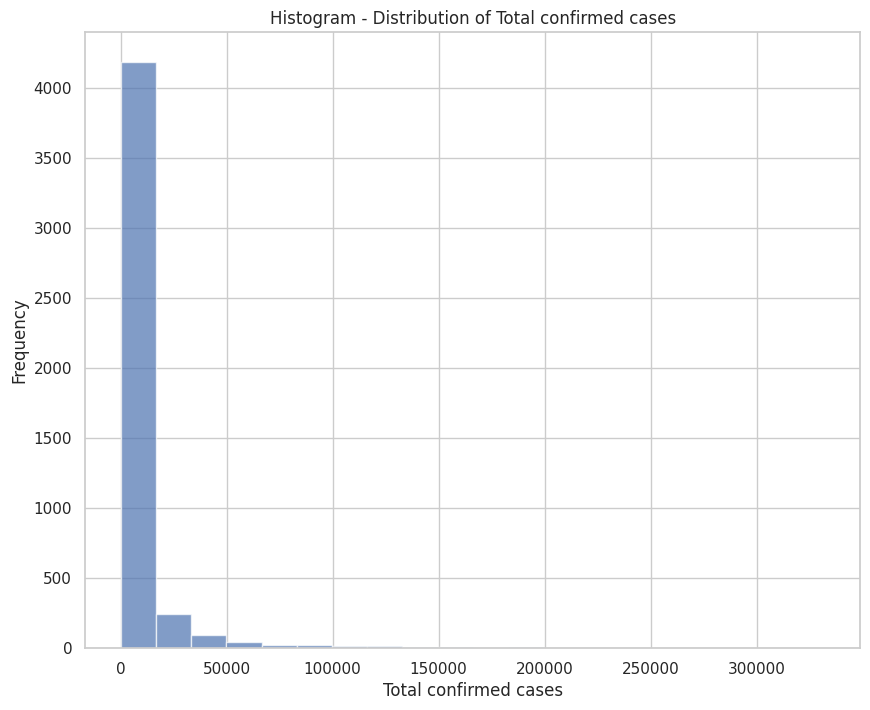

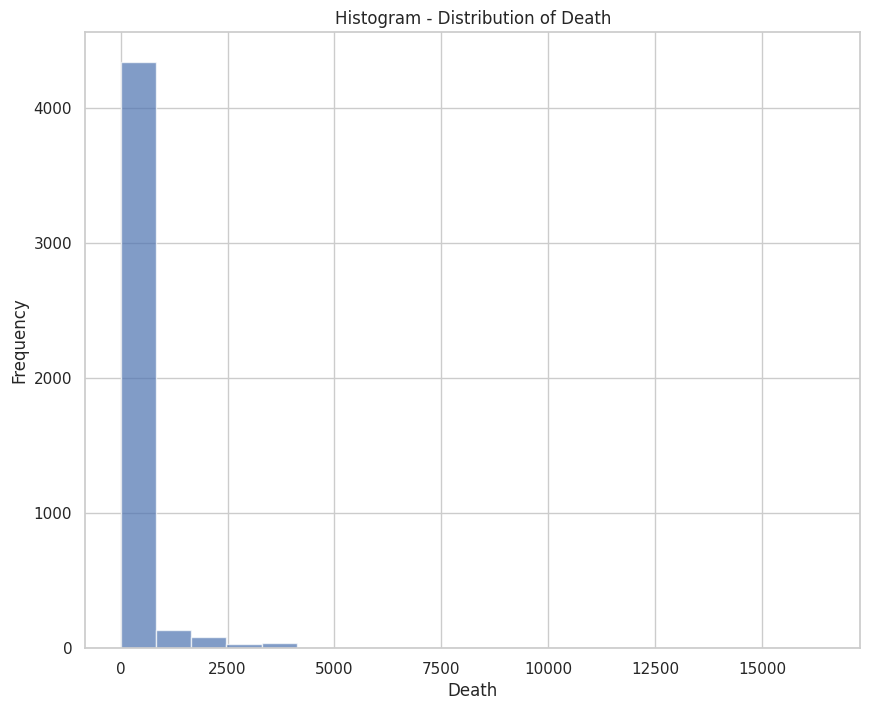

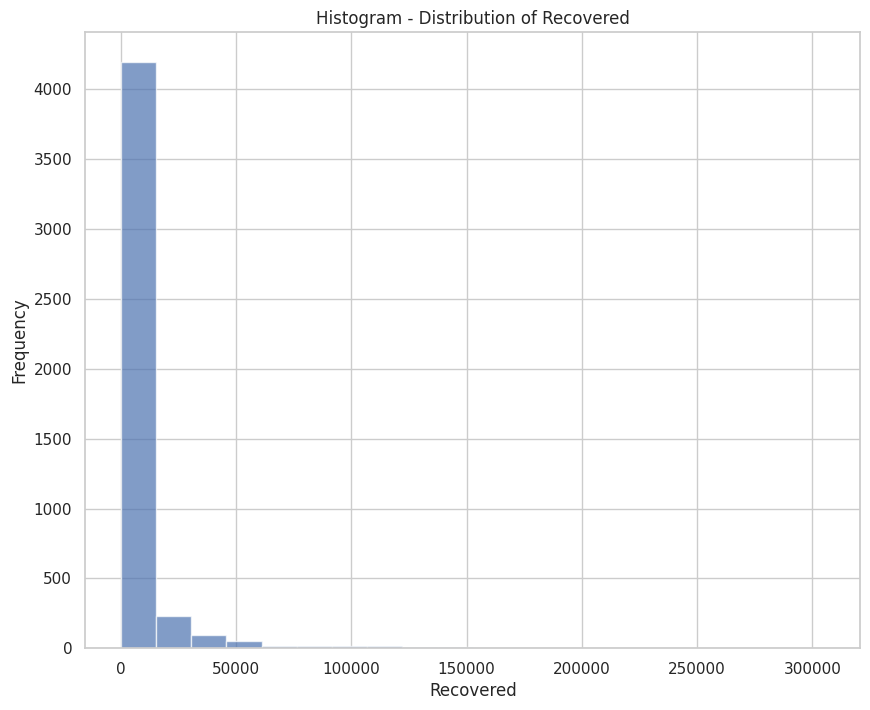

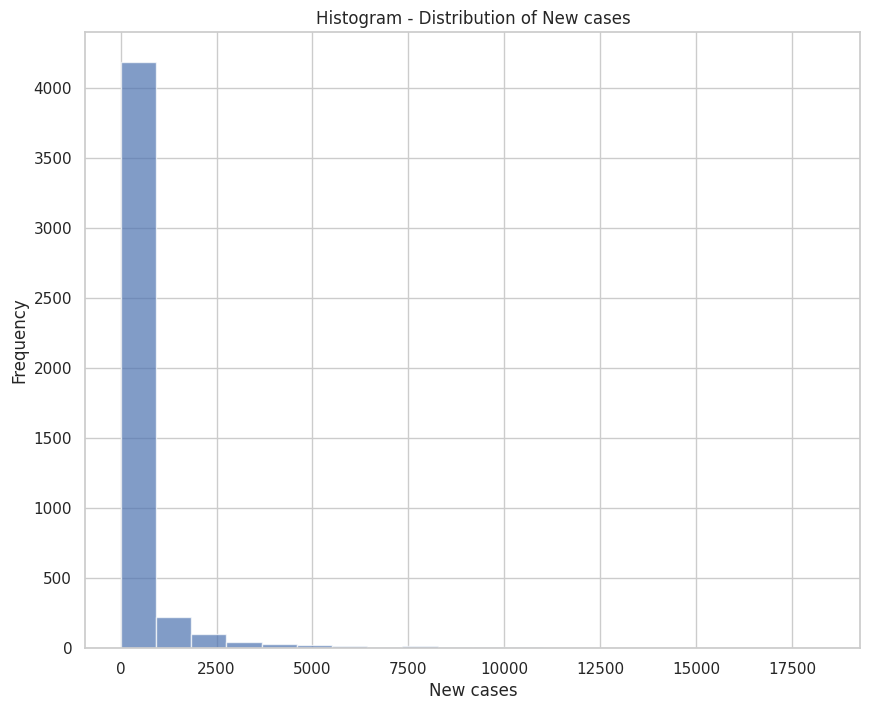

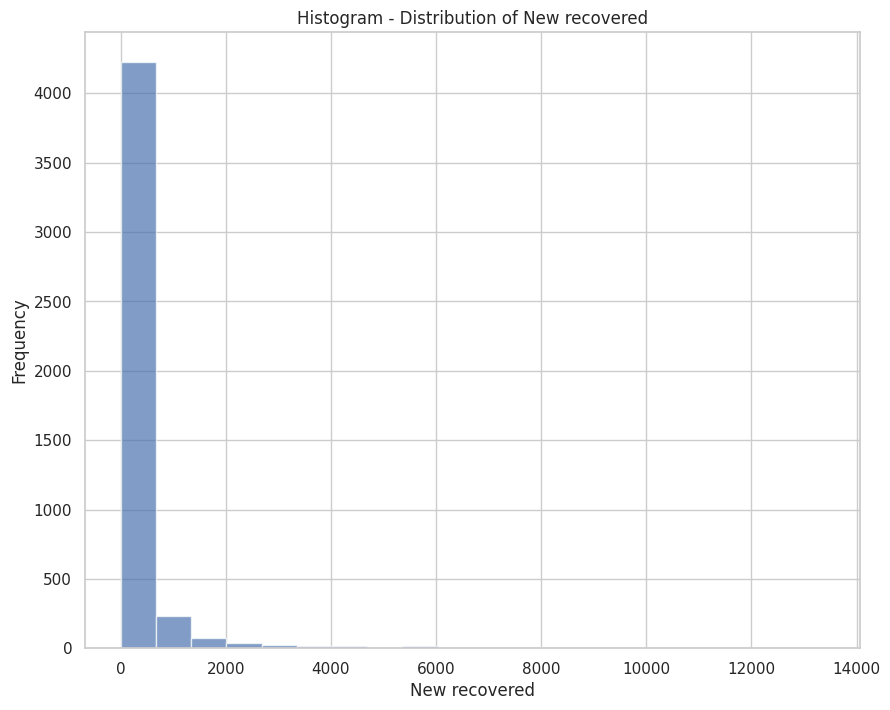

In [ ]:
# Histograms for Distribution Analysis
for metric in metrics:
    plt.figure(figsize=(10, 8))
    plt.hist(df_cleaned[metric], bins=20, alpha=0.7)
    plt.title(f'Histogram - Distribution of {metric}')
    plt.xlabel(metric)
    plt.ylabel('Frequency')
    plt.show()
    print("\n")


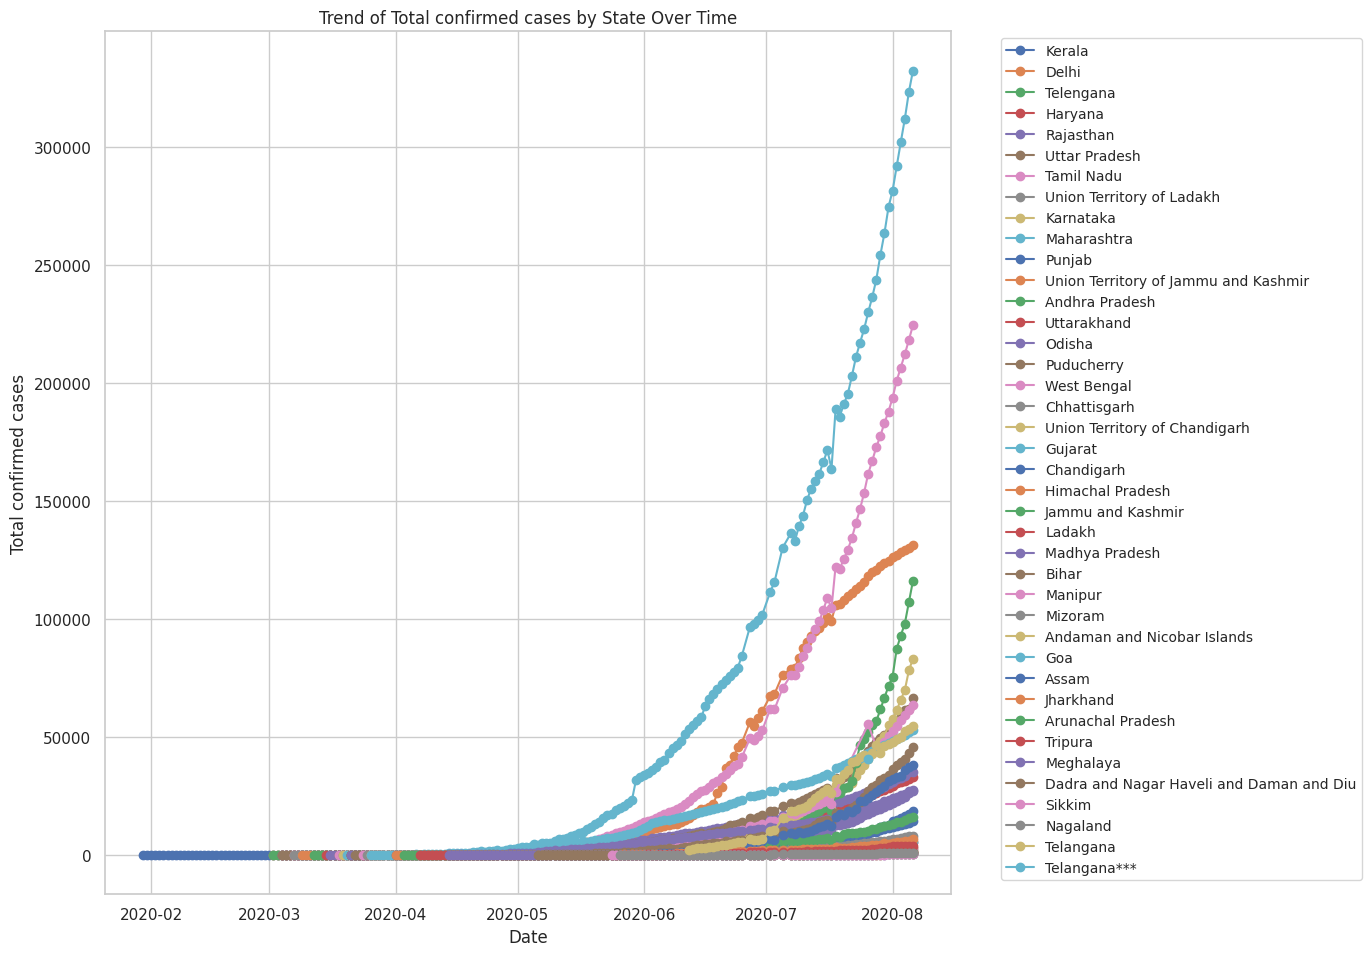

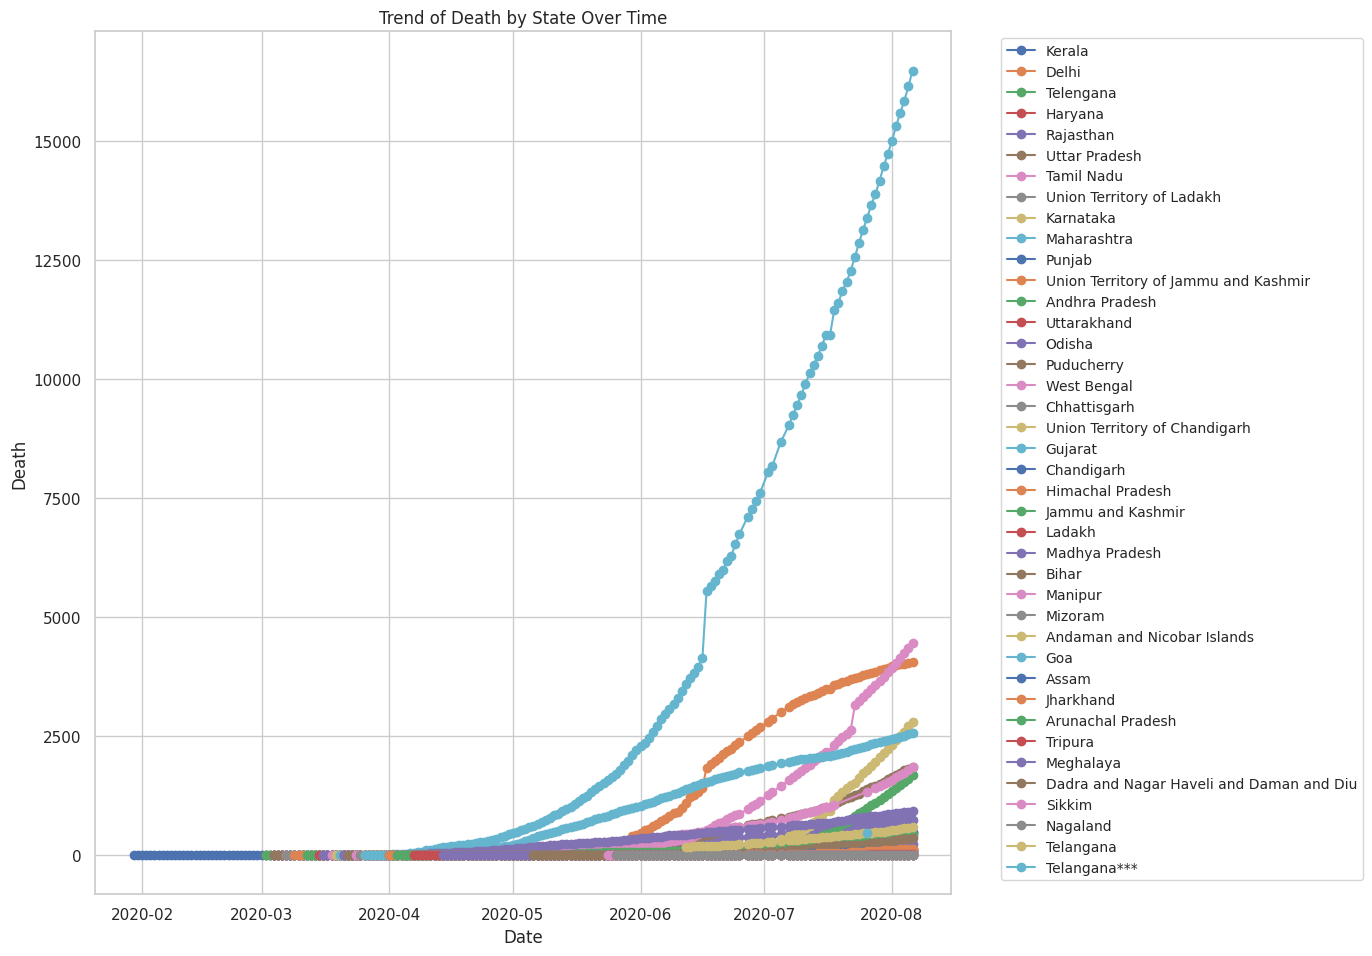

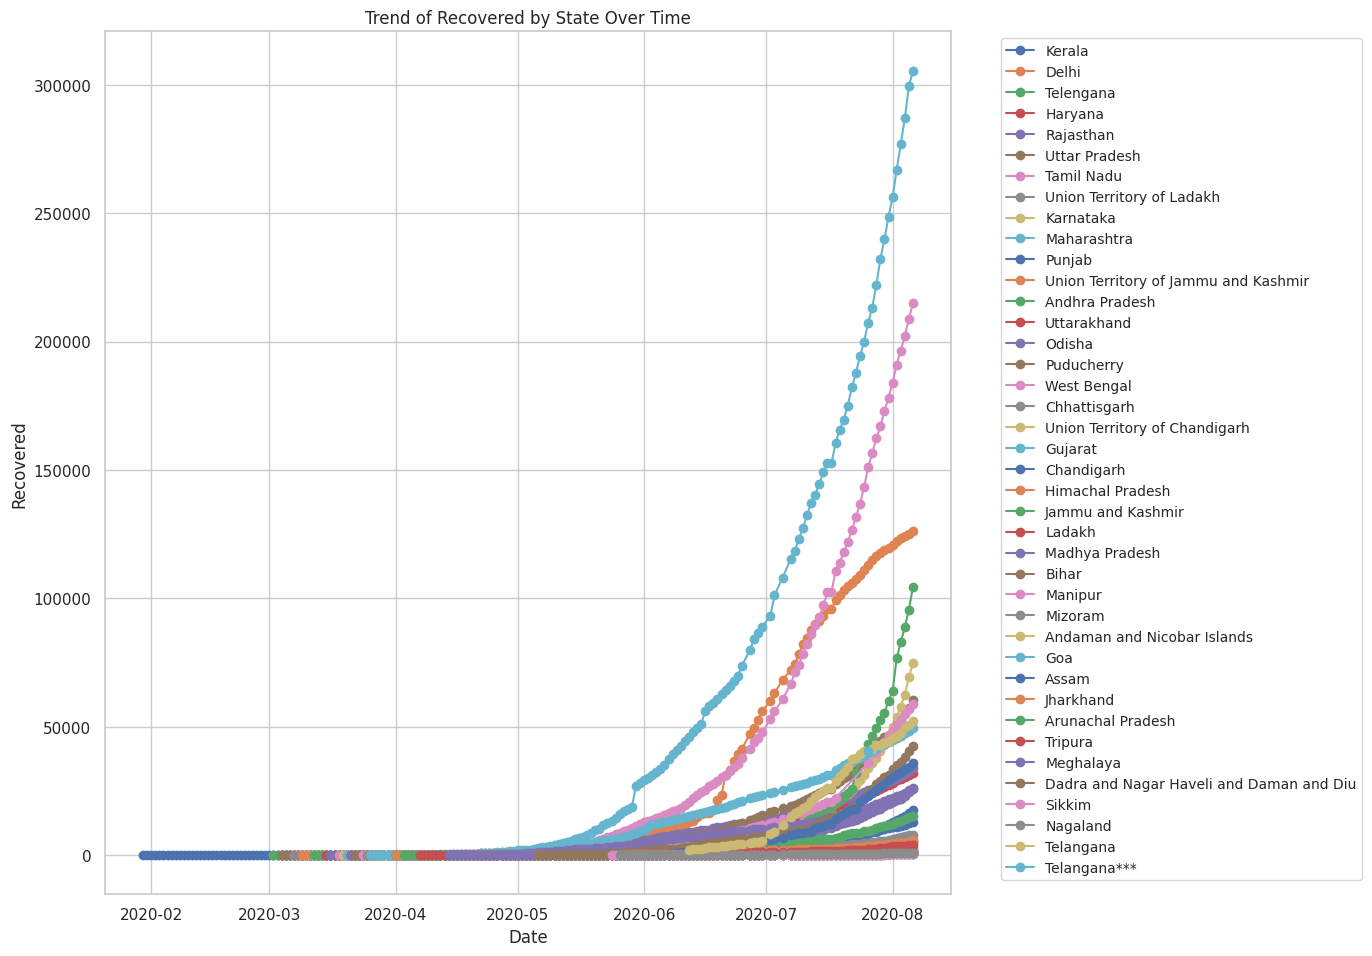

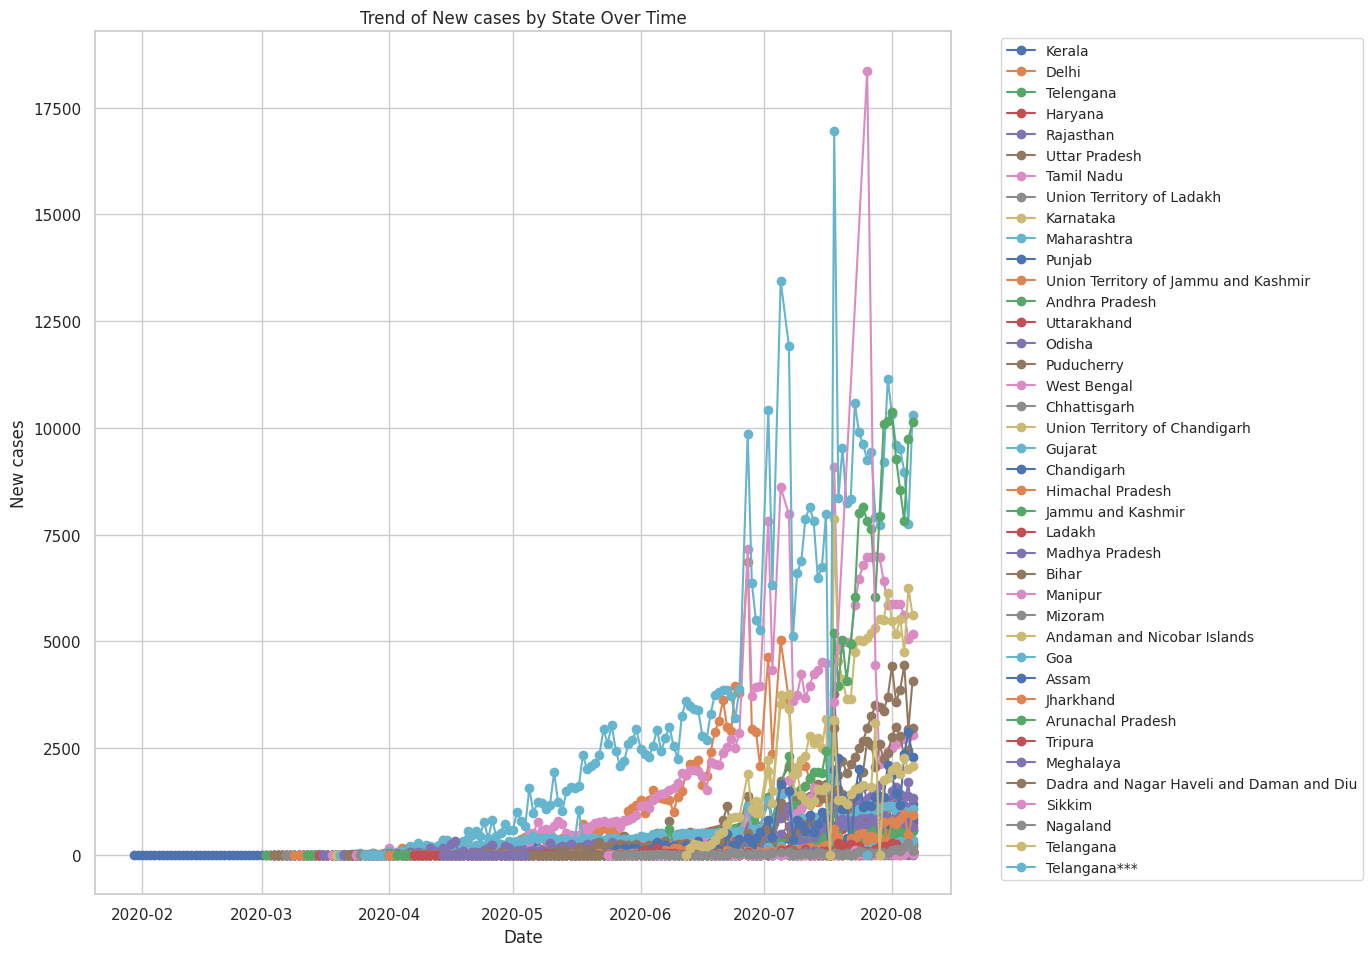

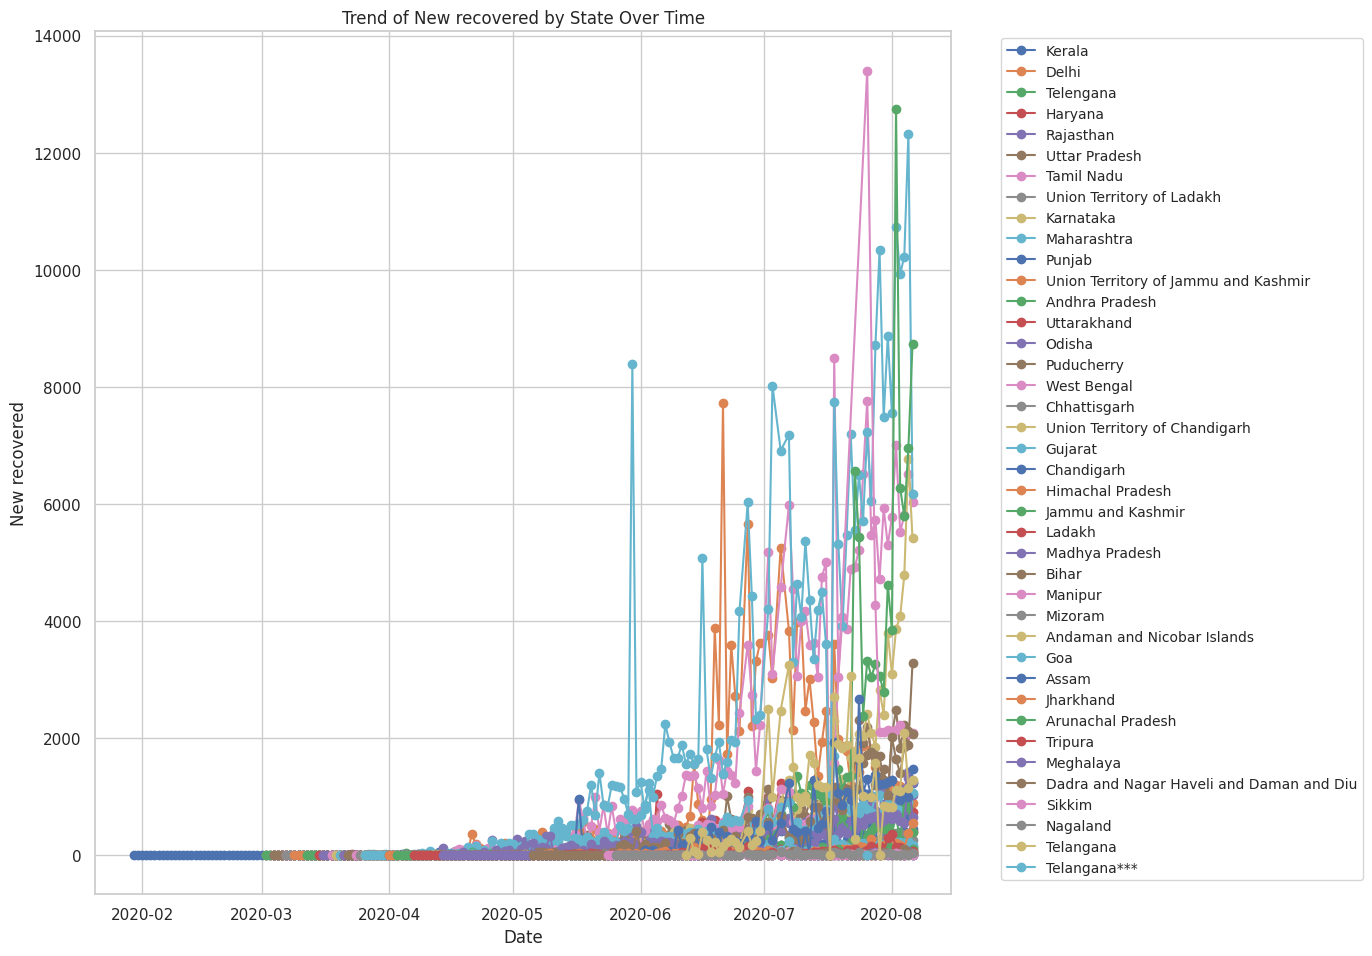

In [ ]:
# Line Plots for Trends by State
for metric in metrics:
    plt.figure(figsize=(14, 10))
    for state in df_cleaned['State'].unique():
        state_data = df_cleaned[df_cleaned['State'] == state]
        plt.plot(state_data['Date'], state_data[metric], label=state, marker='o')
    plt.title(f'Trend of {metric} by State Over Time')
    plt.xlabel('Date')
    plt.ylabel(metric)
    plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize='small')
    plt.tight_layout()
    plt.show()
    print("\n")